Recruit Restaurant Visitor Forecasting

**Mounting the Google Drive  to  access  the data**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Importing the neccessary library**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
import gc
gc.collect()

0

**Loading the Data of AirVisit**


In [ ]:
airvisit_df=pd.read_csv('/content/drive/My Drive/air_visit_data.csv')
airvisit_df.head()

,air_store_id,visit_date,visitors
0,air_ba937bf13d40fb24,2016-01-13,25
1,air_ba937bf13d40fb24,2016-01-14,32
2,air_ba937bf13d40fb24,2016-01-15,29
3,air_ba937bf13d40fb24,2016-01-16,22
4,air_ba937bf13d40fb24,2016-01-18,6


In [ ]:
airvisit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252108 entries, 0 to 252107
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   air_store_id  252108 non-null  object
 1   visit_date    252108 non-null  object
 2   visitors      252108 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 5.8+ MB


**Check  How many Unique values  are  there in the Airvisit**

In [ ]:
airvisit_df.nunique()

air_store_id    829
visit_date      478
visitors        204
dtype: int64

**Check How any null values  are there in the airvisit**

In [ ]:
airvisit_df.isnull().sum().any()

False

**Check How any duplicate values  are there in the airvisit**

In [ ]:
airvisit_duplicated=airvisit_df[airvisit_df.duplicated()]
airvisit_duplicated

,air_store_id,visit_date,visitors


In [ ]:
airvisit_df.describe()

,visitors
count,252108.000000
mean,20.973761
std,16.757007
min,1.000000
25%,9.000000
50%,17.000000
75%,29.000000
max,877.000000


**Load the airstore_data**

In [ ]:
air_store_info=pd.read_csv('/content/drive/My Drive/air_store_info.csv')
air_store_info.head()

,air_store_id,air_genre_name,air_area_name,latitude,longitude
0,air_0f0cdeee6c9bf3d7,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852
1,air_7cc17a324ae5c7dc,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852
2,air_fee8dcf4d619598e,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852
3,air_a17f0778617c76e2,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852
4,air_83db5aff8f50478e,Italian/French,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599


In [ ]:
air_store_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 829 entries, 0 to 828
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   air_store_id    829 non-null    object 
 1   air_genre_name  829 non-null    object 
 2   air_area_name   829 non-null    object 
 3   latitude        829 non-null    float64
 4   longitude       829 non-null    float64
dtypes: float64(2), object(3)
memory usage: 32.5+ KB


In [ ]:
air_store_info.describe()

,latitude,longitude
count,829.000000,829.000000
mean,35.647042,137.415311
std,2.084659,3.650971
min,33.211967,130.195555
25%,34.695124,135.341564
50%,35.658068,139.685474
75%,35.694003,139.751599
max,44.020632,144.273398


**Check  any null values are there in the  AirStore dataset**


In [ ]:
air_store_info.isnull().sum().any()

False

**Loading  the HPG store Dataset**

In [ ]:
hpg_store_info_df=pd.read_csv('/content/drive/My Drive/hpg_store_info.csv')
hpg_store_info_df.head()

,hpg_store_id,hpg_genre_name,hpg_area_name,latitude,longitude
0,hpg_6622b62385aec8bf,Japanese style,Tōkyō-to Setagaya-ku Taishidō,35.643675,139.668221
1,hpg_e9e068dd49c5fa00,Japanese style,Tōkyō-to Setagaya-ku Taishidō,35.643675,139.668221
2,hpg_2976f7acb4b3a3bc,Japanese style,Tōkyō-to Setagaya-ku Taishidō,35.643675,139.668221
3,hpg_e51a522e098f024c,Japanese style,Tōkyō-to Setagaya-ku Taishidō,35.643675,139.668221
4,hpg_e3d0e1519894f275,Japanese style,Tōkyō-to Setagaya-ku Taishidō,35.643675,139.668221


In [ ]:
hpg_store_info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4690 entries, 0 to 4689
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   hpg_store_id    4690 non-null   object 
 1   hpg_genre_name  4690 non-null   object 
 2   hpg_area_name   4690 non-null   object 
 3   latitude        4690 non-null   float64
 4   longitude       4690 non-null   float64
dtypes: float64(2), object(3)
memory usage: 183.3+ KB


In [ ]:
hpg_store_info_df.describe()

,latitude,longitude
count,4690.000000,4690.000000
mean,35.810261,137.675816
std,2.138755,3.197233
min,33.311645,130.339313
25%,34.692109,135.498859
50%,35.659214,139.495733
75%,35.703381,139.737998
max,43.774846,143.714585


**Checking Any  Null values are  there in the  HPG store dataset**

In [ ]:
hpg_store_info_df.isnull().sum().any()

False

**Checking Any  duplicate values are  there in the  HPG store dataset**

In [ ]:
hpg_store_info_df_duplicate=hpg_store_info_df[hpg_store_info_df.duplicated()]
hpg_store_info_df_duplicate

,hpg_store_id,hpg_genre_name,hpg_area_name,latitude,longitude


**Loading  storeid_relation_dataset**

In [ ]:
store_id_df=pd.read_csv('/content/drive/My Drive/store_id_relation.csv')
store_id_df.head()

,air_store_id,hpg_store_id
0,air_63b13c56b7201bd9,hpg_4bc649e72e2a239a
1,air_a24bf50c3e90d583,hpg_c34b496d0305a809
2,air_c7f78b4f3cba33ff,hpg_cd8ae0d9bbd58ff9
3,air_947eb2cae4f3e8f2,hpg_de24ea49dc25d6b8
4,air_965b2e0cf4119003,hpg_653238a84804d8e7


In [ ]:
store_id_df.nunique()

air_store_id    150
hpg_store_id    150
dtype: int64

In [ ]:
store_id_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   air_store_id  150 non-null    object
 1   hpg_store_id  150 non-null    object
dtypes: object(2)
memory usage: 2.5+ KB


**Investigate  HPG store are  there in  the  storeId  relation**

In [ ]:
hpg_store_info_df['hpg_store_id'].isin(store_id_df['hpg_store_id']).sum()

63

**Investigate  store storeId are  there in  the HPG**

In [ ]:
store_id_df['hpg_store_id'].isin(hpg_store_info_df['hpg_store_id']).sum()

63

In [ ]:
hpg_store_info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4690 entries, 0 to 4689
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   hpg_store_id    4690 non-null   object 
 1   hpg_genre_name  4690 non-null   object 
 2   hpg_area_name   4690 non-null   object 
 3   latitude        4690 non-null   float64
 4   longitude       4690 non-null   float64
dtypes: float64(2), object(3)
memory usage: 183.3+ KB


In [ ]:
hpg_store_info_df.nunique()

hpg_store_id      4690
hpg_genre_name      34
hpg_area_name      119
latitude           129
longitude          129
dtype: int64

In [ ]:
store_id_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   air_store_id  150 non-null    object
 1   hpg_store_id  150 non-null    object
dtypes: object(2)
memory usage: 2.5+ KB


In [ ]:
store_id_df.nunique()

air_store_id    150
hpg_store_id    150
dtype: int64

**How many airstoreId are there in the storeId**

In [ ]:
air_store_info['air_store_id'].isin(store_id_df['air_store_id']).sum()

150

**How many storeId  are  there in the airstoreId**

In [ ]:
store_id_df['air_store_id'].isin(air_store_info['air_store_id']).sum()

150

**Only  150  stores which  are  related to the hpgstore out  of 829 through the store_id relation  and  we are  having only airvisit  data** 

**Investigate  the  airstore_id in  air_store_info  and air_visit**

In [ ]:
airvisit_df['air_store_id'].isin(air_store_info['air_store_id']).sum()

252108

In [ ]:
air_store_info['air_store_id'].isin(airvisit_df['air_store_id']).sum()

829

In [ ]:
air_store_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 829 entries, 0 to 828
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   air_store_id    829 non-null    object 
 1   air_genre_name  829 non-null    object 
 2   air_area_name   829 non-null    object 
 3   latitude        829 non-null    float64
 4   longitude       829 non-null    float64
dtypes: float64(2), object(3)
memory usage: 32.5+ KB


In [ ]:
airvisit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252108 entries, 0 to 252107
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   air_store_id  252108 non-null  object
 1   visit_date    252108 non-null  object
 2   visitors      252108 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 5.8+ MB


In [ ]:
airvisit_df.nunique()

air_store_id    829
visit_date      478
visitors        204
dtype: int64

In [ ]:
air_store_info.nunique()

air_store_id      829
air_genre_name     14
air_area_name     103
latitude          108
longitude         108
dtype: int64

**The  entry of the airstoreid  is  their in  the  airstoreinfo  of airstoreid so we have  to  merge  this two  dataset**

In [ ]:
df=airvisit_df.merge(air_store_info, on='air_store_id',how='inner')
df.head()


,air_store_id,visit_date,visitors,air_genre_name,air_area_name,latitude,longitude
0,air_ba937bf13d40fb24,2016-01-13,25,Dining bar,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599
1,air_ba937bf13d40fb24,2016-01-14,32,Dining bar,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599
2,air_ba937bf13d40fb24,2016-01-15,29,Dining bar,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599
3,air_ba937bf13d40fb24,2016-01-16,22,Dining bar,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599
4,air_ba937bf13d40fb24,2016-01-18,6,Dining bar,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 252108 entries, 0 to 252107
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   air_store_id    252108 non-null  object 
 1   visit_date      252108 non-null  object 
 2   visitors        252108 non-null  int64  
 3   air_genre_name  252108 non-null  object 
 4   air_area_name   252108 non-null  object 
 5   latitude        252108 non-null  float64
 6   longitude       252108 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 15.4+ MB


**Convert an object  to  date  in the  dataframe**

In [ ]:

df['visit_date']=pd.to_datetime(df['visit_date'],format='%Y-%m-%d')
df.head()

,air_store_id,visit_date,visitors,air_genre_name,air_area_name,latitude,longitude
0,air_ba937bf13d40fb24,2016-01-13,25,Dining bar,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599
1,air_ba937bf13d40fb24,2016-01-14,32,Dining bar,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599
2,air_ba937bf13d40fb24,2016-01-15,29,Dining bar,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599
3,air_ba937bf13d40fb24,2016-01-16,22,Dining bar,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599
4,air_ba937bf13d40fb24,2016-01-18,6,Dining bar,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599


In [ ]:
df=df.sort_values(by=['air_store_id','visit_date']).reset_index(drop=True)

In [ ]:

df.head()

,air_store_id,visit_date,visitors,air_genre_name,air_area_name,latitude,longitude
0,air_00a91d42b08b08d9,2016-07-01,35,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595
1,air_00a91d42b08b08d9,2016-07-02,9,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595
2,air_00a91d42b08b08d9,2016-07-04,20,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595
3,air_00a91d42b08b08d9,2016-07-05,25,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595
4,air_00a91d42b08b08d9,2016-07-06,29,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595


In [ ]:
df.nunique()

air_store_id      829
visit_date        478
visitors          204
air_genre_name     14
air_area_name     103
latitude          108
longitude         108
dtype: int64

**Investigate  the number of unique areanames  in  the  dataframe**

In [ ]:
area_names=df.groupby(by=['air_area_name']).nunique()
area_names

,air_store_id,visit_date,visitors,air_genre_name,air_area_name,latitude,longitude
air_area_name,,,,,,,
Fukuoka-ken Fukuoka-shi Daimyō,64,478,113,9,1,2,2
Fukuoka-ken Fukuoka-shi Hakata Ekimae,16,476,85,5,1,1,1
Fukuoka-ken Fukuoka-shi Imaizumi,2,287,43,1,1,1,1
Fukuoka-ken Fukuoka-shi Momochi,6,478,82,2,1,1,1
Fukuoka-ken Fukuoka-shi Shiobaru,7,477,77,2,1,1,1
...,...,...,...,...,...,...,...
Ōsaka-fu Ōsaka-shi Nakanochō,2,463,49,1,1,1,1
Ōsaka-fu Ōsaka-shi Nanbasennichimae,2,296,62,1,1,1,1
Ōsaka-fu Ōsaka-shi Shinmachi,10,477,103,4,1,1,1


**Investigate the unique area name  where the latitude and longitude  have the same coordinates**

In [ ]:
multiple_cord=area_names.loc[(area_names['latitude'] >1) | (area_names['longitude'] >1),:]
multiple_cord

,air_store_id,visit_date,visitors,air_genre_name,air_area_name,latitude,longitude
air_area_name,,,,,,,
Fukuoka-ken Fukuoka-shi Daimyō,64,478,113,9,1,2,2
Hokkaidō Sapporo-shi Minami 3 Jōnishi,21,478,120,7,1,2,2
Tōkyō-to Nakano-ku Nakano,6,475,65,2,1,2,2
Tōkyō-to Setagaya-ku Setagaya,30,478,93,6,1,2,2
Tōkyō-to Toshima-ku Minamiikebukuro,12,477,87,4,1,2,2


**Loading  the airReserve Dataset**

In [ ]:
air_reserve=pd.read_csv('/content/drive/My Drive/air_reserve.csv')
air_reserve.head()

,air_store_id,visit_datetime,reserve_datetime,reserve_visitors
0,air_877f79706adbfb06,2016-01-01 19:00:00,2016-01-01 16:00:00,1
1,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,3
2,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,6
3,air_877f79706adbfb06,2016-01-01 20:00:00,2016-01-01 16:00:00,2
4,air_db80363d35f10926,2016-01-01 20:00:00,2016-01-01 01:00:00,5


In [ ]:
air_reserve.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92378 entries, 0 to 92377
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   air_store_id      92378 non-null  object
 1   visit_datetime    92378 non-null  object
 2   reserve_datetime  92378 non-null  object
 3   reserve_visitors  92378 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 2.8+ MB


In [ ]:
air_reserve.isnull().any().sum()

0

In [ ]:
air_reserve.describe()

,reserve_visitors
count,92378.000000
mean,4.481749
std,4.919669
min,1.000000
25%,2.000000
50%,3.000000
75%,5.000000
max,100.000000


**Loading  the Hpg reserve dataset**

In [ ]:
hpg_reserve=pd.read_csv('/content/drive/My Drive/hpg_reserve.csv')
hpg_reserve.head()

,hpg_store_id,visit_datetime,reserve_datetime,reserve_visitors
0,hpg_c63f6f42e088e50f,2016-01-01 11:00:00,2016-01-01 09:00:00,1
1,hpg_dac72789163a3f47,2016-01-01 13:00:00,2016-01-01 06:00:00,3
2,hpg_c8e24dcf51ca1eb5,2016-01-01 16:00:00,2016-01-01 14:00:00,2
3,hpg_24bb207e5fd49d4a,2016-01-01 17:00:00,2016-01-01 11:00:00,5
4,hpg_25291c542ebb3bc2,2016-01-01 17:00:00,2016-01-01 03:00:00,13


In [ ]:
hpg_reserve.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000320 entries, 0 to 2000319
Data columns (total 4 columns):
 #   Column            Dtype 
---  ------            ----- 
 0   hpg_store_id      object
 1   visit_datetime    object
 2   reserve_datetime  object
 3   reserve_visitors  int64 
dtypes: int64(1), object(3)
memory usage: 61.0+ MB


In [ ]:
hpg_reserve.isnull().any().sum()

0

In [ ]:
hpg_reserve.describe()

,reserve_visitors
count,2.000320e+06
mean,5.073785e+00
std,5.416172e+00
min,1.000000e+00
25%,2.000000e+00
50%,3.000000e+00
75%,6.000000e+00
max,1.000000e+02


**Loading the date dataset**

In [ ]:
date_info=pd.read_csv('/content/drive/My Drive/date_info.csv')
date_info.head()

,calendar_date,day_of_week,holiday_flg
0,2016-01-01,Friday,1
1,2016-01-02,Saturday,1
2,2016-01-03,Sunday,1
3,2016-01-04,Monday,0
4,2016-01-05,Tuesday,0


In [ ]:




date_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   calendar_date  517 non-null    object
 1   day_of_week    517 non-null    object
 2   holiday_flg    517 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 12.2+ KB


In [ ]:
date_info.isnull().any().sum()

0

**Loading the test Dataset**

In [ ]:
predicted_data=pd.read_csv('/content/drive/My Drive/sample_submission.csv')
predicted_data.head()


,id,visitors
0,air_00a91d42b08b08d9_2017-04-23,0
1,air_00a91d42b08b08d9_2017-04-24,0
2,air_00a91d42b08b08d9_2017-04-25,0
3,air_00a91d42b08b08d9_2017-04-26,0
4,air_00a91d42b08b08d9_2017-04-27,0


**id can be splitted  from  the  air_storeId, visit_date**

In [ ]:
id_split = predicted_data['id'].str.split('_', expand=True)
id_split.columns=['source','store_id','visit_date']
predicted_data=pd.concat([id_split,predicted_data],axis=1)
predicted_data['air_store_id']=predicted_data['source'].str.cat(predicted_data['store_id'],sep='_')
predicted_data=predicted_data[['id','air_store_id','visit_date','visitors']]
predicted_data['visit_date'] = pd.to_datetime(predicted_data['visit_date'])
predicted_data.head()


,id,air_store_id,visit_date,visitors
0,air_00a91d42b08b08d9_2017-04-23,air_00a91d42b08b08d9,2017-04-23,0
1,air_00a91d42b08b08d9_2017-04-24,air_00a91d42b08b08d9,2017-04-24,0
2,air_00a91d42b08b08d9_2017-04-25,air_00a91d42b08b08d9,2017-04-25,0
3,air_00a91d42b08b08d9_2017-04-26,air_00a91d42b08b08d9,2017-04-26,0
4,air_00a91d42b08b08d9_2017-04-27,air_00a91d42b08b08d9,2017-04-27,0


In [ ]:
predicted_data.air_store_id.nunique()

821

**AirVisit EDA**

**Convert the Visit_date to datetime**

In [ ]:
airvisit_df.visit_date=pd.to_datetime(airvisit_df.visit_date)
airvisit_df.head()

,air_store_id,visit_date,visitors
0,air_ba937bf13d40fb24,2016-01-13,25
1,air_ba937bf13d40fb24,2016-01-14,32
2,air_ba937bf13d40fb24,2016-01-15,29
3,air_ba937bf13d40fb24,2016-01-16,22
4,air_ba937bf13d40fb24,2016-01-18,6


**Objective of  the Analysis& Plotting.**

**1)The  objective  of this  analysis is  to  show  how many  visitors  by each visit date in the airvisit restaurants and see the  trend that  when  it was  raised  to the  highest pick as compared  the  lowet  pick**.

**2)This analysis  is useful  for reataurant owner  to purchase  ingredients  for the  next  day  on the basis  of the number of visitors  came  to the  restaurants based  on  the previous date  visitors numbers.**



**Count Total number of visitors  by date and  plotting**testtesttjjjjkjjjksjsjjjjhhyyhhhhhssssssskpocfjdjjjjjjjjjjjjjjjjjffmoddfddddklllllllllllllll

**Here we found the total  number of  visitors  by visit date  in the  Airvisit  restaurants between  2016  to  2017**

In [ ]:
visitors_by_date=airvisit_df.groupby('visit_date').sum()
visitors_by_date.head()

,visitors
visit_date,
2016-01-01,1033
2016-01-02,1764
2016-01-03,2368
2016-01-04,3326
2016-01-05,3927


Text(0, 0.5, 'Number of visitors')

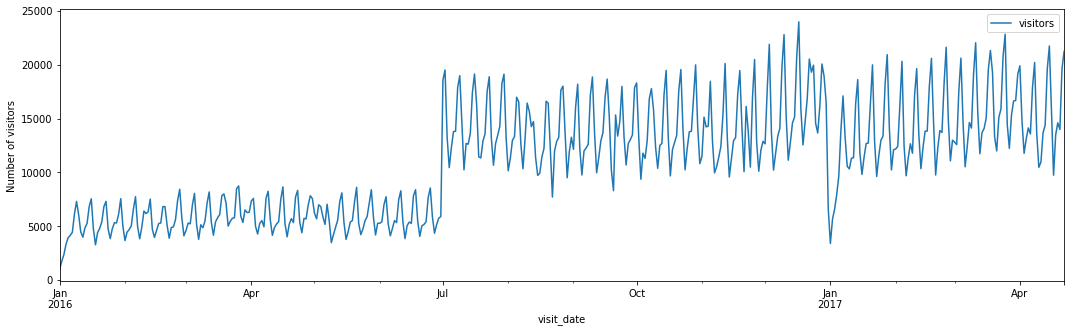

In [ ]:
ax=visitors_by_date.plot(figsize=[18,5])
ax.set_ylabel('Number of visitors')

**Observation**

**1)It started with Jan2016 and fluctuated  trend  of  visitiors by  visit_date till  july and then  on we  steep  increase  happened from approx 4500 visitors to  above 15000 visitors.**

**2)After july again it was  fluctuated  till november and in the  end  of the December the trend  shows  3  times  drop from the current values  of visitors.**

**3)After Jan2017  again one  time  steep  increased and then fluctuated.**

**Conclusion:**

**1)Overall  there is a similar trend from first  6 month and ater that there is a peak till  end  of the year and then again the  similar trend observerd  from january 2017 to  till  the  Apr end  of the  2017.**



**2 ) we are now moved to do  analysis by summarize  the  results  and do the analysis  by monthly &weekly &daily the  number of visitors and  see  the trend.**

In [ ]:
airvisit_df.head()

,air_store_id,visit_date,visitors
0,air_ba937bf13d40fb24,2016-01-13,25
1,air_ba937bf13d40fb24,2016-01-14,32
2,air_ba937bf13d40fb24,2016-01-15,29
3,air_ba937bf13d40fb24,2016-01-16,22
4,air_ba937bf13d40fb24,2016-01-18,6


**Calculate  the weekday from the visitDate**

In [ ]:
airvisit_df['weekday']=airvisit_df['visit_date'].dt.weekday


In [ ]:
airvisit_df.head()


,air_store_id,visit_date,visitors,weekday
0,air_ba937bf13d40fb24,2016-01-13,25,2
1,air_ba937bf13d40fb24,2016-01-14,32,3
2,air_ba937bf13d40fb24,2016-01-15,29,4
3,air_ba937bf13d40fb24,2016-01-16,22,5
4,air_ba937bf13d40fb24,2016-01-18,6,0


**Objective of  the Analysis& Plotting.**

**1)The  objective  of the  analysis  is to show that how  many  number of  visitors  by weekday.i.e means  that visitors  that came between  Monday to  Saturday  and amongst all  the day  which day is  the  highest peak  against  others  in terms  of visitors.**

**2)By looking  this plot The restaurant  owner get an idea about amongst  the  7 days  of  week  which day  is the  highest  visitors  and also  get an idea about the  highest  selling food  amongst  the  other days.**

**3)This  plot is  also useful for impact of  the seasonal  visitors  to  normal viistors  by the  weekday.**

**Count the  Number of  visitors  by weekdays &Plot  the bar chart**


**--> Here we calculate  the  number of visitors by  the weekdays.**

In [ ]:
visitor_by_weekday=airvisit_df.groupby('weekday')['visitors'].sum()
visitor_by_weekday.head()

weekday
0    544202
1    636462
2    707880
3    718987
4    931008
Name: visitors, dtype: int64

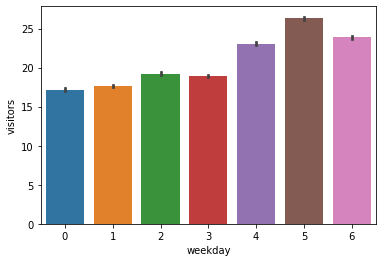

In [ ]:
sns.barplot(x=airvisit_df['weekday'],y=airvisit_df['visitors'])

**Observation**


**In the  first 4 weeks  there is  a small  amount of increase in the  trend of visitors by weekday as compared  to  the  5  the week  and then in  the  last week which shows  the decreased trend of visitors.**

**There is a increasing trend of the visitors  from the starting  to  the end  of the  week and there is  a slightly increase  and decrease  of the  visitors from all the  weekday.**

**Conclusion**

**1)Overall  there is a increasing  trend  of the visitors  that shows  in the  plot  from all  the weekday  and  weekend and also  the  highest  number of visitors are  in the weekend i.e on saturday  and all  the  other  days there are  slight changes  from  day  to  day  of the  week, so that  we need to do again  deeper  analysis  on the  monthly visitors  and show the  trend  of them.**

**2)This analysis  also useful  for restaurants  to  know the idea about the prefrences  of the visitors went for the  restaurant from weekday  to  weekends.**

**Calculate the month from  the visitdate**

**Here we calculate the  number of  visitors by monthly.**

In [ ]:
airvisit_df['month']=airvisit_df['visit_date'].dt.month
airvisit_df['month'] = airvisit_df['month'].apply(lambda x: calendar.month_abbr[x])
airvisit_df.head()


,air_store_id,visit_date,visitors,weekday,month
0,air_ba937bf13d40fb24,2016-01-13,25,2,Jan
1,air_ba937bf13d40fb24,2016-01-14,32,3,Jan
2,air_ba937bf13d40fb24,2016-01-15,29,4,Jan
3,air_ba937bf13d40fb24,2016-01-16,22,5,Jan
4,air_ba937bf13d40fb24,2016-01-18,6,0,Jan


**Objective of  the Analysis& Plotting.**

**1)The  objective  of analysis  is useful  for showing the  trend of the visitors by month and also  compare  the number of  more  visitors who came  in the particular month to  other months.**

**2)Based  on this  analysis the restaurant owners/managers  need  to know the  purchase of  resturant  ingredient by month   and also  allocate the staff accordingly to  serve the customers.**


**3)This analysis  also  useful for  comparing the trend of  selling  food  by monthly**

**Number of visitor by Month&Visualize**

**Here we calculate the month wise visitors  went  to  the  restaurants and take the  food.**

In [ ]:
visitor_by_month=airvisit_df.groupby('month')['visitors'].sum()
visitor_by_month.head()

month
Apr    520508
Aug    408300
Dec    497617
Feb    561396
Jan    539772
Name: visitors, dtype: int64

Text(0, 0.5, 'Monthly Visitors')

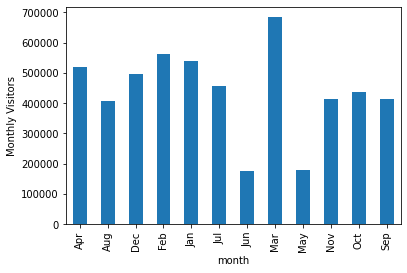

In [ ]:
ax=visitor_by_month.plot.bar()
ax.set_ylabel('Monthly Visitors')

**Obeservation**

**1)The  highest  visitors are  in  the  month of march  as compared  to all the  months and  lowest  visitors contribution from  the  month of May and  June.***

**2)There are  slight change  of  visitors went to restaurants from every month except  the  march, may and june**




**Conclusion**

**1)Overall  there  is  a  increaing trend  of the  visitors  by  month  visit to a  restaurant and taking the  food.**

**2)This analysis  also useful  for restaurants  to  know the idea about the prefrences  of the visitors went for the  restaurant monthly**

**Calculate  the day  from  the visitDate**

**Here we calculate  the  day  from the  visit date  and  shows the trend of visitors  by daily  of visitors.**

In [ ]:
airvisit_df['day']=airvisit_df['visit_date'].dt.day
airvisit_df.head()

,air_store_id,visit_date,visitors,weekday,month,day
0,air_ba937bf13d40fb24,2016-01-13,25,2,Jan,13
1,air_ba937bf13d40fb24,2016-01-14,32,3,Jan,14
2,air_ba937bf13d40fb24,2016-01-15,29,4,Jan,15
3,air_ba937bf13d40fb24,2016-01-16,22,5,Jan,16
4,air_ba937bf13d40fb24,2016-01-18,6,0,Jan,18


**Calculate Visitiors By day and Visualize**

In [ ]:
visitors_by_day=airvisit_df.groupby('day')['visitors'].sum()
visitors_by_day.head()

day
1    159755
2    168461
3    173242
4    171852
5    164872
Name: visitors, dtype: int64

**Objective of  the Analysis& Plotting.**

**1)The  objective  of analysis  is useful  for showing the  trend of the visitors by daily and also  compare  the number of  more  visitors who came  in the particular day to  other days of the month.**

**2)Based  on this  analysis the restaurant owners/managers  need  to know the  purchase of  resturant  ingredient by daily   and also  allocate the staff accordingly to  serve the customers.**


**3)This analysis  also  useful for  comparing the trend of  selling  food  by daily**

Text(0, 0.5, '# of Visitiors')

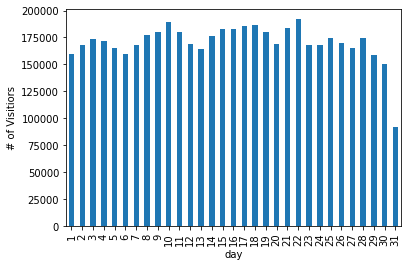

In [ ]:
ax1=visitors_by_day.plot.bar()
ax1.set_ylabel('# of Visitiors')

**Observation**

**1)It is  a  fluctuated tred  starti ng  with the  first  day  to the end of the day of the  month.**

**2)The highest  visitors are on the  23rd day  and  the lowest  visitors are  on the  last day of the month other days are  fluctuated.**

**Conclusions**

**1)Overall There are fluctuated trend of  visitors  by daily, i.e means someday  there are slight increase and someday decrease.This  analysis  shows  the  per day  how many  number of visitors came  to  the restaurant and  take  the  food.**

**2)By comparing  the visitors from month to  week and  week  to day  the restaurant owners need  a complete idea  of visiting behaviour of the  visitors and  purchasing ingredients from the  market.**

**Calculate Weekly  mean visitors &Visualize**

**Here we calculate  the weekly  mean visitors by weekday**.

In [ ]:
weekly_median_visitors=airvisit_df.groupby('weekday')['visitors'].mean()
weekly_median_visitors.head()
df1=pd.DataFrame(weekly_median_visitors)
df1

,visitors
weekday,
0,17.177009
1,17.672137
2,19.230121
3,18.922702
4,23.072737
5,26.313688
6,23.873362


**Objective of the analysis and plotting**

**1)The objective  of  this analysis  to see  how many numbers  of the mean  visitors by weekday  and get the  overall  idea on day there is a chance of mean numbers  of visitors  to  a  restaurant**.

**2)This analysis is  useful  for restaurants owners for making decision for preparing  the food  for customers  and avoid the wastage  of the  food.**

Text(0, 0.5, 'weekly  Mean  visitors')

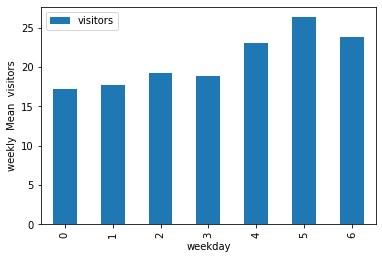

In [ ]:
ax2=df1.plot.bar()
ax2.set_ylabel('weekly  Mean  visitors')

**Observation**

**1)The  first four weeks of the mean visitors are  increasing  and  in the last  week  theer is a small  amount  of a  steep  decrease in  the  mean visitors.**

**2)The highest mean  visitors are  in  the last  week  adn the  lowest  mean visitors are  in the  first and third week**

**Conclusion**

**1)The overall trend of the mean visitors  by weekday  are  in the increasing by day every weekday, this shows  the  seeling  of food  to  the customers by every week  is increasing**.  

**Calculate Montly mean visitors &Visualize**  

**Here we calcuate the  Mean  number of visitors  by month**

In [ ]:
Monthly_mean_visitors=airvisit_df.groupby('month')['visitors'].mean()
Monthly_mean_visitors.head()


month
Apr    21.816002
Aug    19.748489
Dec    23.128840
Feb    20.477695
Jan    19.976758
Name: visitors, dtype: float64

**Objective of Analysis and Plotting**

**1)The objective  of  this analysis  to see  how many numbers  of the mean  visitors by Month  and get the  overall  idea on month,  there is a chance of mean numbers  of visitors  to  a  restaurant**.

**2)This analysis is  useful  for restaurants owners for making decision for preparing  the food  for customers  and avoid the wastage  of the  food.**

Text(0, 0.5, 'Monthly mean visitors')

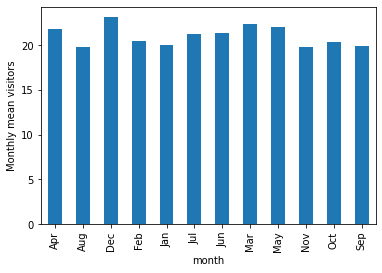

In [ ]:
ax2=Monthly_mean_visitors.plot.bar()
ax2.set_ylabel('Monthly mean visitors')


**Observation**

**1)In the  Dec month there is a  highest mean visitors and and all other months are  culmulatively  increasing by small number of the visitors and in the Aug there is  small  decrease  in the visitors.**

**2)Overall there are slightly fluctuated trend  of  the  visitors  to  went  to the  restaurant and  take  the  food.** 

**Conclusion**

**1)The overall trend of the mean visitors  by month  are  in the fluctuated by every month, this shows  the  selling  of food  to  the customers by every month  is slighly changed.**.  

**Calculate the daily mean visitors**

**Here we calculate  the mean  visitors  by daily**.

In [ ]:
daily_mean_visitors=airvisit_df.groupby('day')['visitors'].mean()
daily_mean_visitors.head()


day
1    19.981864
2    21.107756
3    21.788706
4    21.057714
5    20.076961
Name: visitors, dtype: float64

**Objective of the Analysis and PLotting**

**1)The objective  of  this analysis  to see  how many numbers  of the mean  visitors by day  and get the  overall  idea on day,  there is a chance of mean numbers  of visitors  to  a  restaurant**.

**2)This analysis is  useful  for restaurants owners for making decision for preparing  the food  for customers  and avoid the wastage  of the  food.**

Text(0, 0.5, 'monthly mean visitors')

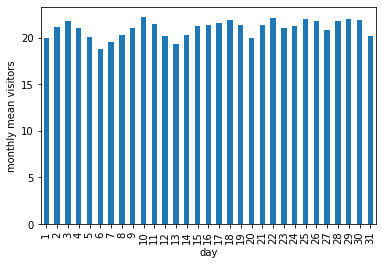

In [ ]:
ax4=daily_mean_visitors.plot.bar()
ax4.set_ylabel('monthly mean visitors')

**Observation**

**1)It is  a  fluctuated tred  starting  with the  first  day  to the end of the day of the  month.**

**2)The highest  visitors are on the  10th day  and  the lowest  visitors are  on the  7th day of the month other days are  fluctuated.**

**Conclusion**

**1)The overall trend of the mean visitors  by day  are  in the fluctuated by every day, this shows  the  selling  of food  to  the customers by every day  is slighly changed.**.  

**Filter out the golden week from visit to a restaurants**

**Here we are sppliting  the visit date  between two long  periods and  find the  golden week of visiting  to  a  restaurants.**

In [ ]:
mask=(airvisit_df['visit_date']>('2016-04-15')) & (airvisit_df['visit_date']<('2016-06-15'))

In [ ]:
airvisit_df=airvisit_df.loc[mask]
airvisit_df


,air_store_id,visit_date,visitors,weekday,month,day
79,air_ba937bf13d40fb24,2016-04-16,35,5,Apr,16
80,air_ba937bf13d40fb24,2016-04-18,21,0,Apr,18
81,air_ba937bf13d40fb24,2016-04-19,23,1,Apr,19
82,air_ba937bf13d40fb24,2016-04-20,33,2,Apr,20
83,air_ba937bf13d40fb24,2016-04-21,11,3,Apr,21
...,...,...,...,...,...,...
251599,air_c7d30ab0e07f31d5,2016-06-10,17,4,Jun,10
251600,air_c7d30ab0e07f31d5,2016-06-11,22,5,Jun,11
251601,air_c7d30ab0e07f31d5,2016-06-12,12,6,Jun,12
251602,air_c7d30ab0e07f31d5,2016-06-13,10,0,Jun,13


**Objective of  this analysis &plotting**

**1)The objective of  this analysis is to find the golden week  between the 2 months in which the visitors are at the  peak  between 2 months as compared to the another months.**

**2)Based  on this analysis the restaurants owner need  to  get  an idea of the  most  important month of the year where  the rush of  the visitors  to a  restaurant is  more.**

In [ ]:
visitiors_new_filter=airvisit_df.groupby('visit_date')['visitors'].sum()
visitiors_new_filter.head()

visit_date
2016-04-16    8656
2016-04-17    5253
2016-04-18    4011
2016-04-19    5181
2016-04-20    5706
Name: visitors, dtype: int64

Text(0, 0.5, 'Number of Visitors  between  dates')

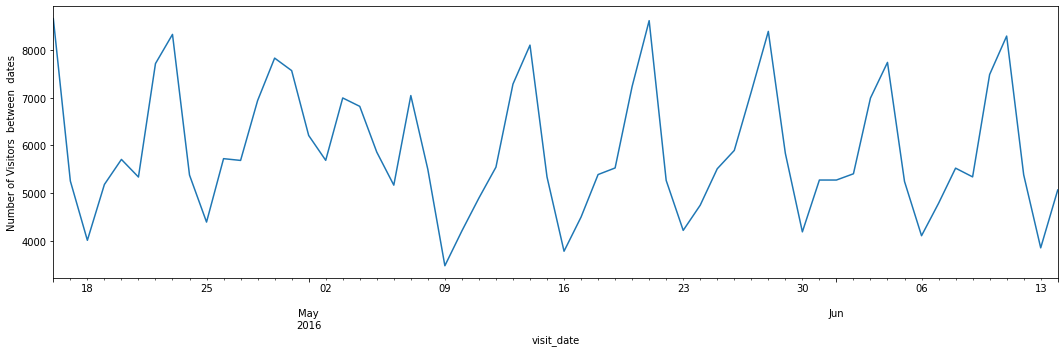

In [ ]:
ax4=visitiors_new_filter.plot(figsize=[18,5])
ax4.set_ylabel('Number of Visitors  between  dates')

**Observation**

**1)There is a  golden week from  Apr 29 to May05 and  starting  with steep  decrease  in the visitors, while  after 18th of april there is  increase  trend  and simulteneously it is  fluctuating and in the  mid  week of june  it is  started  to raising the visitors.**

**2)There are  so much ups  and downs  from the two  months  of visits  by a visitor to  a  restaurant.**

**Conclusion**

**1)The overall  conclusion from this  plot is  that midmonths  of the  year  is  the golden week  where there are  many  visitors  who  can  visit   to a  restaurant.**

**AirReserVation EDA**

In [ ]:
air_reserve.head()

,air_store_id,visit_datetime,reserve_datetime,reserve_visitors
0,air_877f79706adbfb06,2016-01-01 19:00:00,2016-01-01 16:00:00,1
1,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,3
2,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,6
3,air_877f79706adbfb06,2016-01-01 20:00:00,2016-01-01 16:00:00,2
4,air_db80363d35f10926,2016-01-01 20:00:00,2016-01-01 01:00:00,5


**Convert the  visit_datetime  to  datetime**

In [ ]:
air_reserve.visit_datetime=pd.to_datetime(air_reserve.visit_datetime)
air_reserve.head()

,air_store_id,visit_datetime,reserve_datetime,reserve_visitors
0,air_877f79706adbfb06,2016-01-01 19:00:00,2016-01-01 16:00:00,1
1,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,3
2,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,6
3,air_877f79706adbfb06,2016-01-01 20:00:00,2016-01-01 16:00:00,2
4,air_db80363d35f10926,2016-01-01 20:00:00,2016-01-01 01:00:00,5


**Calculate  the number of  reserve visitors by visit date&Visualize**

---



**Objective of Analysis &plotting**

**1)The  objective of this  analysis  to  check the  number of reserve visitors by  visitdate and based  on this  observation the restaurant owners decide  to  setup the seating  arrangements  of  the  visitors  on a  number of  tables  in  the  restaurant.**

**2)based on this analysis we  know the  impact  of the reservation  on that  day  before  the visitor visit to  a restaurant.**

In [ ]:
reservervisitors_by_visit_date=air_reserve.groupby('visit_datetime')['reserve_visitors'].sum()
reservervisitors_by_visit_date.head()

visit_datetime
2016-01-01 19:00:00    10
2016-01-01 20:00:00     7
2016-01-02 01:00:00     6
2016-01-02 16:00:00     4
2016-01-02 17:00:00    77
Name: reserve_visitors, dtype: int64

Text(0, 0.5, 'Total  # of  Reservation by visit datetime')

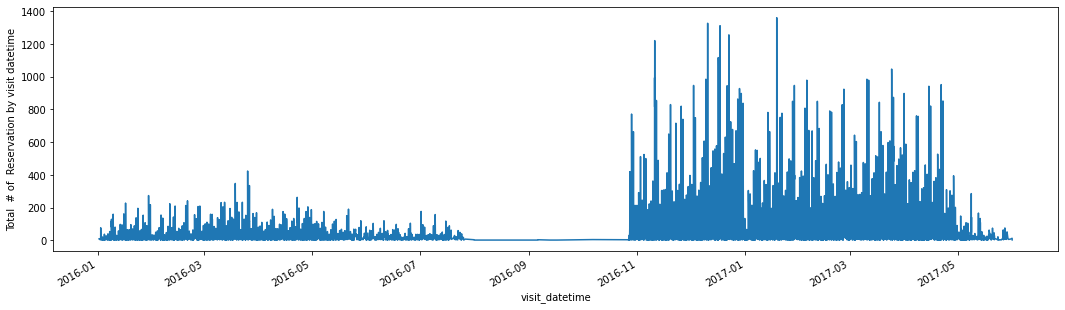

In [ ]:
ax5=reservervisitors_by_visit_date.plot(figsize=[18,5])
ax5.set_ylabel('Total  # of  Reservation by visit datetime')

**observation**

**1)Reservation  starts after the  5th day of the first  month  of  january  in 2016 and then fluctuated  till the end of  Aug month of  2016.**

**2)There is  a same contribution  of the visitors  from sept 2016  upto November 2016  and then after it is  fluctuated and in the end  of the  jun 2017  it is consistently decreasing.**

**Conclusion**

**1)The overall conclusion  from this  plot  is that the  reservation is  considerablly  done  from  starting  month of january  till  the end  of  the  may  2017  but  sometimes  the reservation done by very less  visitors and  sometimes the  reservation  done  by  many  visitors, so  season  is  also  important factor for reservation of  the  visitors.** 

**Calcuate the  hour from  the reservation system**

In [ ]:
air_reserve['hour']=air_reserve['visit_datetime'].dt.hour
air_reserve.head()

,air_store_id,visit_datetime,reserve_datetime,reserve_visitors,hour
0,air_877f79706adbfb06,2016-01-01 19:00:00,2016-01-01 16:00:00,1,19
1,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,3,19
2,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,6,19
3,air_877f79706adbfb06,2016-01-01 20:00:00,2016-01-01 16:00:00,2,20
4,air_db80363d35f10926,2016-01-01 20:00:00,2016-01-01 01:00:00,5,20


**Objective of the analysis& plotting**

**1)The objective of this analysis is to  show the  hourly reserve  visitors  from  the reservation system.**

**2)This is  an important  analysis for  the visitors and restaurant owner  to  judge  the timings of the  particular  customer  visits for taking food without wasting any time  and also  the  other visitors from  the  other hourly slot are not  waiting  for  their  time  for  food.**

**Calculate the reserve visitors by the hour &Visulize**

In [ ]:
reservedvisitors_by_hour=air_reserve.groupby('hour')['reserve_visitors'].sum()
reservedvisitors_by_hour.head()



hour
0    2758
1    2190
2    1218
3     707
4     414
Name: reserve_visitors, dtype: int64

Text(0, 0.5, '# of  Reserve visitors by  Hour')

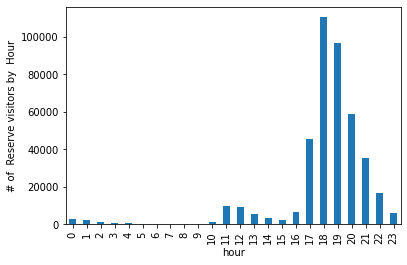

In [ ]:
ax6=reservedvisitors_by_hour.plot.bar()
ax6.set_ylabel('# of  Reserve visitors by  Hour')

**Observation**

**1)The contribution of Visitor reservation by hourly is  small  in the  early morning  and in the  afternoon it is  steep  increasing  till  the  8  oclock in the evening  and then steep  decrease after  11  PM in  the night.**

**2)This plot shows that in the initial hours there are not that much of the  reservation happend but after in the  afternoon there is a  increase  in the  reservation**

**Convert the reserve datetime  to  datetime  and calculate the  hour  from  reserve_datetime**

In [ ]:
air_reserve.reserve_datetime=pd.to_datetime(air_reserve.reserve_datetime)
air_reserve['reserve_hour']=air_reserve['reserve_datetime'].dt.hour
air_reserve.head()

,air_store_id,visit_datetime,reserve_datetime,reserve_visitors,hour,reserve_hour
0,air_877f79706adbfb06,2016-01-01 19:00:00,2016-01-01 16:00:00,1,19,16
1,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,3,19,19
2,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,6,19,19
3,air_877f79706adbfb06,2016-01-01 20:00:00,2016-01-01 16:00:00,2,20,16
4,air_db80363d35f10926,2016-01-01 20:00:00,2016-01-01 01:00:00,5,20,1


**Calculate the time between Visit and Reservation &Visualize**

In [ ]:
air_reserve['difference_hour']=air_reserve['hour']-air_reserve['reserve_hour']
air_reserve.head()

,air_store_id,visit_datetime,reserve_datetime,reserve_visitors,hour,reserve_hour,difference_hour
0,air_877f79706adbfb06,2016-01-01 19:00:00,2016-01-01 16:00:00,1,19,16,3
1,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,3,19,19,0
2,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,6,19,19,0
3,air_877f79706adbfb06,2016-01-01 20:00:00,2016-01-01 16:00:00,2,20,16,4
4,air_db80363d35f10926,2016-01-01 20:00:00,2016-01-01 01:00:00,5,20,1,19


**Objective of Analysis&plotting**

**1)The objective of this analysis is to check  the  number of visitors between reservation  to  visits, so that it is useful  to  know that  the particular visitor can reserve  the  number of  seats  on this  day  and visit to a  restaurant  on the next  day  or the day of  the week.**

In [ ]:
visitors_by_diff_hours=air_reserve.groupby('difference_hour')['reserve_visitors'].sum()
visitors_by_diff_hours.head()

difference_hour
-23    229
-22    293
-21    369
-20    523
-19    937
Name: reserve_visitors, dtype: int64

Text(0, 0.5, 'All Visitors')

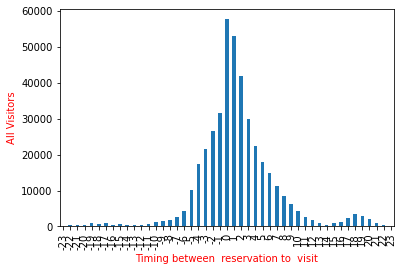

In [ ]:
ax1=visitors_by_diff_hours.plot.bar()
ax1.set_xlabel('Timing between  reservation to  visit',color='red')
ax1.set_ylabel('All Visitors',color='red')

**Observation**

**1)There is very long scale break  between  a  reservation and visit and  those are the most  extreme values  for the airdata  as there is  format of hour is  between  before  24  hour to  next  day  24  hour.**

**2)This plot shows  the difference between the  reserve time and visit time and based  on that  the  number of visitors  are  visits   on that  particular hour  and there are breaks  in between  the visit and reservation.**

**Conclusion**

**1)The overallconclusion from this plot is that  theer is break between visit to  a reservation  in the initial  hours and  in the afternoon it shows the fluctuations.**

**Calculate  the Day  difference between the visit_datetime and reserve_datetime and Visualize**

In [ ]:
air_reserve['Difference'] = (air_reserve['visit_datetime'] - air_reserve['reserve_datetime']).dt.days

air_reserve.head()

,air_store_id,visit_datetime,reserve_datetime,reserve_visitors,hour,reserve_hour,difference_hour,Difference
0,air_877f79706adbfb06,2016-01-01 19:00:00,2016-01-01 16:00:00,1,19,16,3,0
1,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,3,19,19,0,0
2,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,6,19,19,0,0
3,air_877f79706adbfb06,2016-01-01 20:00:00,2016-01-01 16:00:00,2,20,16,4,0
4,air_db80363d35f10926,2016-01-01 20:00:00,2016-01-01 01:00:00,5,20,1,19,0


**Objective of the analysis &plotting**

**1)The  objective of this analysis is to show the visitors  between the  difference of visit day and reserve day.**

**2)This analysis  is useful  for  the  restaurant  owners  to  know  that  how  many days  are  vacant of a  particular  visitors  for  reserve day  and the  vist to  a  restaurant.**

In [ ]:
visitors_by_diff_day=air_reserve.groupby('Difference')['reserve_visitors'].sum()
visitors_by_diff_day




Difference
0      104048
1       39718
2       27971
3       22884
4       17686
        ...  
381        12
382         6
386         5
392         3
393        20
Name: reserve_visitors, Length: 372, dtype: int64

Text(0, 0.5, '# visitors  by days  difference(Visiteday-reserveDay')

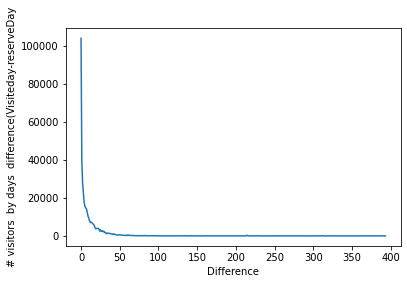

In [ ]:
ax7=visitors_by_diff_day.plot()
ax7.set_ylabel('# visitors  by days  difference(Visiteday-reserveDay')

**Observation**

**1)In the Initial days i.e.from 1 to 45 days visitors are at the highest  pick  and after completing 50  th day  there is  a  similar trend of visitors  till    days of  400 difference.**

**2)By the  difference  of the days between  visits and reservation there is a drop  of  visitors  when the days are  increasing and after  some  days there are similar visitors consistently.**

In [ ]:
air_reserve.head()

,air_store_id,visit_datetime,reserve_datetime,reserve_visitors,hour,reserve_hour,difference_hour,Difference
0,air_877f79706adbfb06,2016-01-01 19:00:00,2016-01-01 16:00:00,1,19,16,3,0
1,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,3,19,19,0,0
2,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,6,19,19,0,0
3,air_877f79706adbfb06,2016-01-01 20:00:00,2016-01-01 16:00:00,2,20,16,4,0
4,air_db80363d35f10926,2016-01-01 20:00:00,2016-01-01 01:00:00,5,20,1,19,0


**Count the number of  unique reserve stores &Visualize**

In [ ]:
air_reserve['air_store_id'].nunique()

314

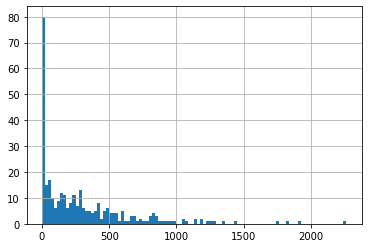

In [ ]:
air_reserve['air_store_id'].value_counts().hist(bins=100)

**Calculate the  Number of airstore by reserve vistiors and visualize**

In [ ]:
air_reserve.groupby('air_store_id')['reserve_visitors'].sum()

air_store_id
air_00a91d42b08b08d9      70
air_0164b9927d20bcc3     517
air_034a3d5b40d5b1b1      93
air_03963426c9312048    8200
air_04341b588bde96cd     208
                        ... 
air_fcfbdcf7b1f82c6e     333
air_fdc02ec4a3d21ea4     166
air_fe22ef5a9cbef123    1393
air_fea5dc9594450608     471
air_fee8dcf4d619598e       5
Name: reserve_visitors, Length: 314, dtype: int64

**Objective of the Analysis &plotting**

**1)The  objective  of  the  analysis  is to  show the  number of  visitors  by day  of  the  hour  of  weekday and make a decision  that  at which  hour  on a particular  day name how many number of visitors came  to  the restaurant and  take  the  food**

In [ ]:
#air_reserve.head()
air_reserve['month']=air_reserve['reserve_datetime'].dt.month
air_reserve['month'] = air_reserve['month'].apply(lambda x: calendar.month_abbr[x])
air_reserve.head()

,air_store_id,visit_datetime,reserve_datetime,reserve_visitors,hour,reserve_hour,difference_hour,Difference,month
0,air_877f79706adbfb06,2016-01-01 19:00:00,2016-01-01 16:00:00,1,19,16,3,0,Jan
1,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,3,19,19,0,0,Jan
2,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,6,19,19,0,0,Jan
3,air_877f79706adbfb06,2016-01-01 20:00:00,2016-01-01 16:00:00,2,20,16,4,0,Jan
4,air_db80363d35f10926,2016-01-01 20:00:00,2016-01-01 01:00:00,5,20,1,19,0,Jan


In [ ]:
air_reserve['reserve_datetime_weekdayname'] = air_reserve['reserve_datetime'].dt.day_name()
air_reserve.head()

,air_store_id,visit_datetime,reserve_datetime,reserve_visitors,hour,reserve_hour,difference_hour,Difference,month,reserve_datetime_weekdayname
0,air_877f79706adbfb06,2016-01-01 19:00:00,2016-01-01 16:00:00,1,19,16,3,0,Jan,Friday
1,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,3,19,19,0,0,Jan,Friday
2,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,6,19,19,0,0,Jan,Friday
3,air_877f79706adbfb06,2016-01-01 20:00:00,2016-01-01 16:00:00,2,20,16,4,0,Jan,Friday
4,air_db80363d35f10926,2016-01-01 20:00:00,2016-01-01 01:00:00,5,20,1,19,0,Jan,Friday


Text(0, 0.5, 'number  of  visitors')

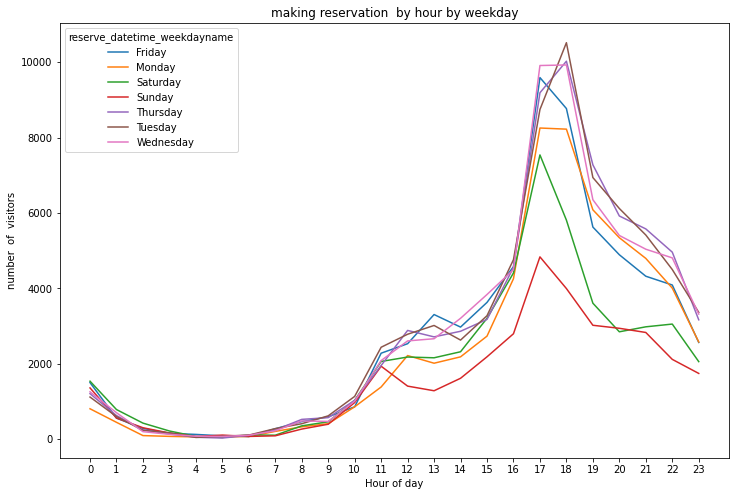

In [ ]:
ax=air_reserve.pivot_table(index=air_reserve['reserve_hour'],columns='reserve_datetime_weekdayname',values='reserve_visitors',aggfunc='sum').plot(figsize=(12,8),title='making reservation  by hour by weekday', xticks=np.arange(0, 24, 1))
ax.set_xlabel('Hour of day')
ax.set_ylabel('number  of  visitors')

**Observation**

**In all the days  starting  from Monday to  Sunday  the  inital  hours shows the  upward  trend of  visitors till  the  evening 6 oclock  and after that  there  is a  downward  trend  of visitors  till  the night 11 PM**

**This  plot is  based  on the  reserveweekdayname of the day of the  hour  how many visitors  visits  to  a restaurants  and also  compares the more visitors on day  of the  hour between the  time  interval.**

**Conclusion**

**The overall  conclusion  of  this  plot is  to show the  impact of each  weekday associated  with hour  on visitors numbers and  justify  the  rush hour of  the entire day of  the week.**

**Calculate the  Hour of  the day of  visitweek  and visualize**

In [ ]:
air_reserve['visit_datetime_weekdayname'] = air_reserve['visit_datetime'].dt.day_name()
air_reserve.head()

,air_store_id,visit_datetime,reserve_datetime,reserve_visitors,hour,reserve_hour,difference_hour,Difference,month,reserve_datetime_weekdayname,visit_datetime_weekdayname
0,air_877f79706adbfb06,2016-01-01 19:00:00,2016-01-01 16:00:00,1,19,16,3,0,Jan,Friday,Friday
1,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,3,19,19,0,0,Jan,Friday,Friday
2,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,6,19,19,0,0,Jan,Friday,Friday
3,air_877f79706adbfb06,2016-01-01 20:00:00,2016-01-01 16:00:00,2,20,16,4,0,Jan,Friday,Friday
4,air_db80363d35f10926,2016-01-01 20:00:00,2016-01-01 01:00:00,5,20,1,19,0,Jan,Friday,Friday


**Objective of the Analysis &plotting**

**1)The  objective  of  the  analysis  is to  show the  number of  visitors  by day  of  the  hour  of  weekday and make a decision  that  at which  hour  on a particular  day name how many number of visitors came  to  the restaurant and  take  the  food**

**2) This analysis  is based  on the  visit weekday name**

Text(0, 0.5, 'number  of  visitors')

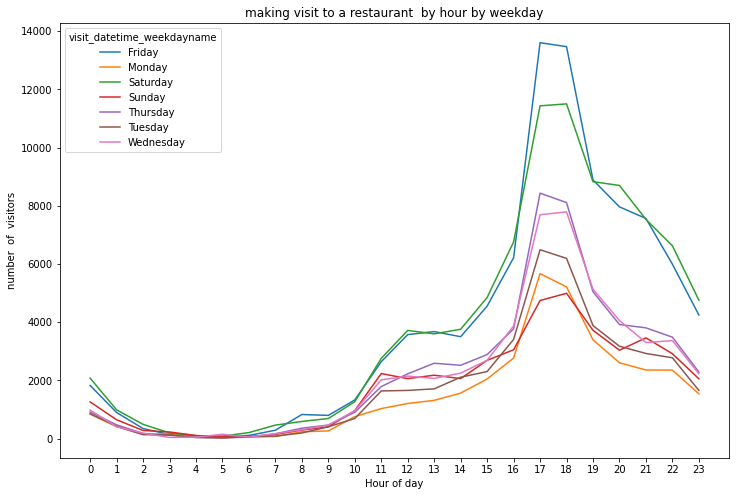

In [ ]:
ax=air_reserve.pivot_table(index=air_reserve['reserve_hour'],columns='visit_datetime_weekdayname',values='reserve_visitors',aggfunc='sum').plot(figsize=(12,8),title='making visit to a restaurant  by hour by weekday', xticks=np.arange(0, 24, 1))
ax.set_xlabel('Hour of day')
ax.set_ylabel('number  of  visitors')

**Observation**

**1)In all the days  starting  from Monday to  Sunday  the  inital  hours shows the  similar trend of  visitors till 9 oclock in the  morning and then shows  the  upward  trend  till evening 6 oclock  and after that  there  is a  downward  trend  of visitors  till  the night 11 PM**

**2)As compared to  Saturday and Sunday there is a  high  peak  of visitors  in between the afternoon 3PM to  evening  7PM**

**Calculate the Monthly Reserve Visitors**

**Objective of the analysis&plotting**

**The  objective  of the analysis is to show  the number of reserved visitors  monthly.**

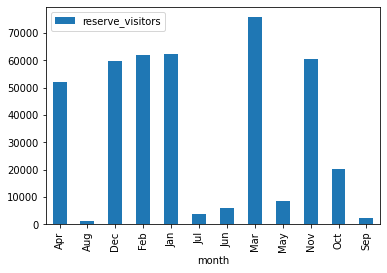

In [ ]:
monthly_reservation=air_reserve.groupby('month')['reserve_visitors'].sum()
monthly_reservation.head()
df1=pd.DataFrame(monthly_reservation)
df1.plot.bar()

**Observation**

**1)In the Month of Matrch has the  highest reservation made  by visitors  and in the august lowest  rservation made  by visitors**.

**2)From december of previous year to  the  April  there is increase  trend in the  reservation of visitors  after  it is  decreasing.**

**3)Seasonality  is  important in  the  monthly reserved visitors  based  on the festivals or  some  events  which needs  to  be  occur  on that day..**

**Conclusion**

**1)The  overallconclusion  of this plot is  to show the the reserved  visitors  amongst  the  month where some  of the months  has  the  highest  number of visitors  as  compared  to  other months due  to  seasonality  and festivals.**

**Calculate  the Yearly reservation made  by the  Visitors**

**Objective of the analysis &plotting**

**1)The  objective of this analysis  is to  show the  bunch of  visitors  from year and  compared  agaonst  each  year  for  more visitors  amongst  the  other.**

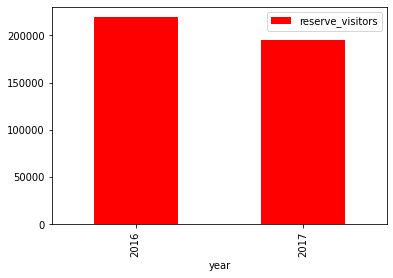

In [ ]:
air_reserve['year']=air_reserve['reserve_datetime'].dt.year
yearly_reservation=air_reserve.groupby('year')['reserve_visitors'].sum()
df2=pd.DataFrame(yearly_reservation)
df2.plot.bar(color='red')

**Observation**

**1)There are  more visitors  who made more reservation in 2016 as comapred  to  2017**

**HPG Reservation**

In [ ]:
hpg_reserve.head()


,hpg_store_id,visit_datetime,reserve_datetime,reserve_visitors
0,hpg_c63f6f42e088e50f,2016-01-01 11:00:00,2016-01-01 09:00:00,1
1,hpg_dac72789163a3f47,2016-01-01 13:00:00,2016-01-01 06:00:00,3
2,hpg_c8e24dcf51ca1eb5,2016-01-01 16:00:00,2016-01-01 14:00:00,2
3,hpg_24bb207e5fd49d4a,2016-01-01 17:00:00,2016-01-01 11:00:00,5
4,hpg_25291c542ebb3bc2,2016-01-01 17:00:00,2016-01-01 03:00:00,13


**Convert the hpg_visit_datetime  to  datetime**  

In [ ]:
hpg_reserve.visit_datetime=pd.to_datetime(hpg_reserve.visit_datetime)
hpg_reserve.head()

,hpg_store_id,visit_datetime,reserve_datetime,reserve_visitors
0,hpg_c63f6f42e088e50f,2016-01-01 11:00:00,2016-01-01 09:00:00,1
1,hpg_dac72789163a3f47,2016-01-01 13:00:00,2016-01-01 06:00:00,3
2,hpg_c8e24dcf51ca1eb5,2016-01-01 16:00:00,2016-01-01 14:00:00,2
3,hpg_24bb207e5fd49d4a,2016-01-01 17:00:00,2016-01-01 11:00:00,5
4,hpg_25291c542ebb3bc2,2016-01-01 17:00:00,2016-01-01 03:00:00,13


**Objective of Analysis &plotting**

**1)The  objective of this  analysis  to  check the  number of hpg reserve visitors by  visitdate and based  on this  observation the restaurant owners decide  to  setup the seating  arrangements  of  the  visitors  on a  number of  tables  in  the  restaurant.**

**2)based on this analysis we  know the  impact  of the reservation  on that  day  before  the visitor visit to  a restaurant.**

**Calculate the number of  reserve visitor by date &Visualize**

In [ ]:
hpg_visitors_by_date=hpg_reserve.groupby('visit_datetime')['reserve_visitors'].sum()
hpg_visitors_by_date.head()

visit_datetime
2016-01-01 11:00:00      1
2016-01-01 13:00:00      3
2016-01-01 16:00:00      2
2016-01-01 17:00:00    112
2016-01-01 18:00:00    156
Name: reserve_visitors, dtype: int64

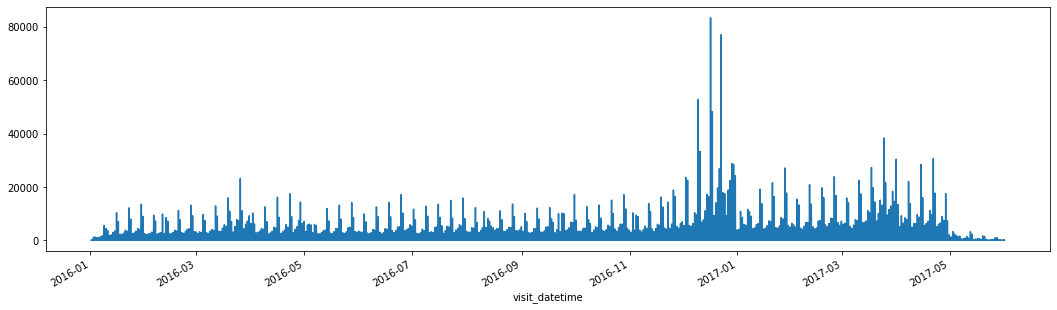

In [ ]:
hpg_visitors_by_date.plot(figsize=[18,5])

**observation**

**1)Reservation  starts after the  5th day of the first  month  of  january  in 2016 and then fluctuated  till the end of  year of  2016.**

**2)There is a  updward  trend in the starting  months of  2017  and it stays  till the month of may after then  it is a  steep  decrease.**



**Conclusion**

**1)The overall conclusion  from this  plot  is that the  reservation is  considerablly  done  from  starting  month of january  till  the end  of  the  may  2017  but  sometimes  the reservation done by very less  visitors and  sometimes the  reservation  done  by  many  visitors, so  season  is  also  important factor for reservation of  the  visitors.** 

**Calculate the hour from the HPG_reserve visit_datetime**

In [ ]:
hpg_reserve['hour']=hpg_reserve['visit_datetime'].dt.hour
hpg_reserve.head()

,hpg_store_id,visit_datetime,reserve_datetime,reserve_visitors,hour
0,hpg_c63f6f42e088e50f,2016-01-01 11:00:00,2016-01-01 09:00:00,1,11
1,hpg_dac72789163a3f47,2016-01-01 13:00:00,2016-01-01 06:00:00,3,13
2,hpg_c8e24dcf51ca1eb5,2016-01-01 16:00:00,2016-01-01 14:00:00,2,16
3,hpg_24bb207e5fd49d4a,2016-01-01 17:00:00,2016-01-01 11:00:00,5,17
4,hpg_25291c542ebb3bc2,2016-01-01 17:00:00,2016-01-01 03:00:00,13,17


**Objective of the analysis& plotting**

**1)The objective of this analysis is to  show the  hourly reserve  visitors  from  the hpg reservation system.**

**2)This is  an important  analysis for  the visitors and restaurant owner  to  judge  the timings of the  particular  customer  visits for taking food without wasting any time  and also  the  other visitors from  the  other hourly slot are not  waiting  for  their  time  for  food.**

**Calculate the number of reservevisitors by hour &Visualize**

In [ ]:
hpg_reserve_visitors_by_hour=hpg_reserve.groupby('hour')['reserve_visitors'].sum()
hpg_reserve_visitors_by_hour.head()

hour
0    12443
1     8113
2     2948
3     1022
4      875
Name: reserve_visitors, dtype: int64

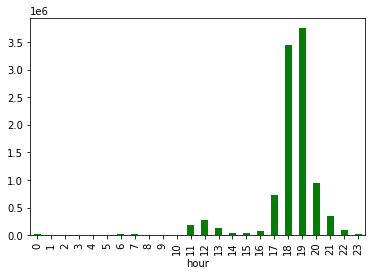

In [ ]:
ax1=hpg_reserve_visitors_by_hour.plot.bar(color='green')

**Observation**

**1)No reservation  made by the visitors till the 10  oclock in  the  morining  and after  that  is  started  with  very little amount  of  reservation made till  5 oclock in the evening and in the  6 PM to  7PM there is  highest  number of  reservation happened as compared  to  the  all  the  other hours of the day and in the  night there is  a decreasing  trend of the  reservation  made  by visitor.**

**2)This plot shows that in the initial hours there are not that much of the  reservation happend but after in the  afternoon there is a  increase  in the  reservation**

In [ ]:
hpg_reserve.reserve_datetime=pd.to_datetime(hpg_reserve.reserve_datetime)
hpg_reserve['reserve_hour']=hpg_reserve['reserve_datetime'].dt.hour
hpg_reserve.head()

,hpg_store_id,visit_datetime,reserve_datetime,reserve_visitors,hour,reserve_hour
0,hpg_c63f6f42e088e50f,2016-01-01 11:00:00,2016-01-01 09:00:00,1,11,9
1,hpg_dac72789163a3f47,2016-01-01 13:00:00,2016-01-01 06:00:00,3,13,6
2,hpg_c8e24dcf51ca1eb5,2016-01-01 16:00:00,2016-01-01 14:00:00,2,16,14
3,hpg_24bb207e5fd49d4a,2016-01-01 17:00:00,2016-01-01 11:00:00,5,17,11
4,hpg_25291c542ebb3bc2,2016-01-01 17:00:00,2016-01-01 03:00:00,13,17,3


**Calculate the Time between the Reservation to  Visit**

In [ ]:
hpg_reserve['difference_hour']=hpg_reserve['hour']-hpg_reserve['reserve_hour']
hpg_reserve.head()

,hpg_store_id,visit_datetime,reserve_datetime,reserve_visitors,hour,reserve_hour,difference_hour
0,hpg_c63f6f42e088e50f,2016-01-01 11:00:00,2016-01-01 09:00:00,1,11,9,2
1,hpg_dac72789163a3f47,2016-01-01 13:00:00,2016-01-01 06:00:00,3,13,6,7
2,hpg_c8e24dcf51ca1eb5,2016-01-01 16:00:00,2016-01-01 14:00:00,2,16,14,2
3,hpg_24bb207e5fd49d4a,2016-01-01 17:00:00,2016-01-01 11:00:00,5,17,11,6
4,hpg_25291c542ebb3bc2,2016-01-01 17:00:00,2016-01-01 03:00:00,13,17,3,14


**Objective of Analysis&plotting**

**1)The objective of this analysis is to check  the  number of visitors between reservation  to  visits, so that it is useful  to  know that  the particular visitor can reserve  the  number of  seats  on this  day  and visit to a  restaurant  on the next  day  or the day of  the week.**

In [ ]:
hpg_reserve_visitors_by_diff_hours=hpg_reserve.groupby('difference_hour')['reserve_visitors'].sum()
hpg_reserve_visitors_by_diff_hours.head()

difference_hour
-23     778
-22    1268
-21    1244
-20    1458
-19    1203
Name: reserve_visitors, dtype: int64

Text(0, 0.5, 'All Visitors')

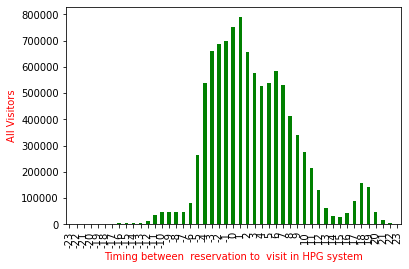

In [ ]:
ax2=hpg_reserve_visitors_by_diff_hours.plot.bar(color='green')
ax2.set_xlabel('Timing between  reservation to  visit in HPG system',color='red')
ax2.set_ylabel('All Visitors',color='red')

**Observation**

**1)There is very frequent scale happened between  a  reservation and visit and  those are the most  extreme values  for the hpgreservedata  as there is  format of hour is  between  before  24  hour to  next  day  24  hour.**

**2)This plot shows  the difference between the  reserve time and visit time and based  on that  the  number of visitors  are  visits   on that  particular hour  and there are breaks  in between  the visit and reservation.**

**Conclusion**

**1)The overall conclusion from this plot is that  theer is break between visit to  a reservation  in the initial  hours and  in the afternoon it shows the frequent fluctuations.**

**Calculate  the Day  difference between the visit_datetime and reserve_datetime and Visualize**

In [ ]:
hpg_reserve['Difference_days'] = (hpg_reserve['visit_datetime'] - hpg_reserve['reserve_datetime']).dt.days

hpg_reserve.head()

,hpg_store_id,visit_datetime,reserve_datetime,reserve_visitors,hour,reserve_hour,difference_hour,Difference_days
0,hpg_c63f6f42e088e50f,2016-01-01 11:00:00,2016-01-01 09:00:00,1,11,9,2,0
1,hpg_dac72789163a3f47,2016-01-01 13:00:00,2016-01-01 06:00:00,3,13,6,7,0
2,hpg_c8e24dcf51ca1eb5,2016-01-01 16:00:00,2016-01-01 14:00:00,2,16,14,2,0
3,hpg_24bb207e5fd49d4a,2016-01-01 17:00:00,2016-01-01 11:00:00,5,17,11,6,0
4,hpg_25291c542ebb3bc2,2016-01-01 17:00:00,2016-01-01 03:00:00,13,17,3,14,0


**Objective of the analysis &plotting**

**1)The  objective of this analysis is to show the visitors  between the  difference of visit day and reserve day.**

**2)This analysis  is useful  for  the  restaurant  owners  to  know  that  how  many days  are  vacant of a  particular  visitors  for  reserve day  and the  vist to  a  restaurant.**

In [ ]:
Visitors_by_day_hpg_reserve=hpg_reserve.groupby('Difference_days')['reserve_visitors'].sum()
Visitors_by_day_hpg_reserve

Difference_days
0       863918
1      1023046
2       873459
3       851107
4       671549
        ...   
156          4
164          6
195          2
362          5
368          2
Name: reserve_visitors, Length: 123, dtype: int64

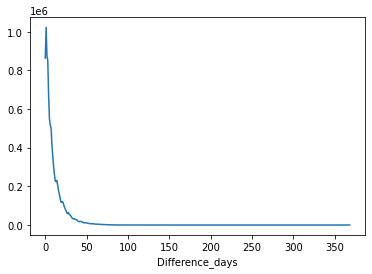

In [ ]:
ax1=Visitors_by_day_hpg_reserve.plot()

**Observation**

**1)In the Initial days i.e.from 1 to 45 days visitors are at the highest  pick  and after completing 50  th day  there is  a  similar trend of visitors  till    days of  350 difference.**

**2)By the  difference  of the days between  visits and reservation there is a drop  of  visitors  when the days are  increasing and after  some  days there are similar visitors consistently.**

In [ ]:
hpg_reserve.head()

,hpg_store_id,visit_datetime,reserve_datetime,reserve_visitors,hour,reserve_hour,difference_hour,Difference_days
0,hpg_c63f6f42e088e50f,2016-01-01 11:00:00,2016-01-01 09:00:00,1,11,9,2,0
1,hpg_dac72789163a3f47,2016-01-01 13:00:00,2016-01-01 06:00:00,3,13,6,7,0
2,hpg_c8e24dcf51ca1eb5,2016-01-01 16:00:00,2016-01-01 14:00:00,2,16,14,2,0
3,hpg_24bb207e5fd49d4a,2016-01-01 17:00:00,2016-01-01 11:00:00,5,17,11,6,0
4,hpg_25291c542ebb3bc2,2016-01-01 17:00:00,2016-01-01 03:00:00,13,17,3,14,0


In [ ]:
#air_reserve.head()
hpg_reserve['month']=hpg_reserve['reserve_datetime'].dt.month
hpg_reserve['month'] = hpg_reserve['month'].apply(lambda x: calendar.month_abbr[x])
hpg_reserve.head()

,hpg_store_id,visit_datetime,reserve_datetime,reserve_visitors,hour,reserve_hour,difference_hour,Difference_days,month
0,hpg_c63f6f42e088e50f,2016-01-01 11:00:00,2016-01-01 09:00:00,1,11,9,2,0,Jan
1,hpg_dac72789163a3f47,2016-01-01 13:00:00,2016-01-01 06:00:00,3,13,6,7,0,Jan
2,hpg_c8e24dcf51ca1eb5,2016-01-01 16:00:00,2016-01-01 14:00:00,2,16,14,2,0,Jan
3,hpg_24bb207e5fd49d4a,2016-01-01 17:00:00,2016-01-01 11:00:00,5,17,11,6,0,Jan
4,hpg_25291c542ebb3bc2,2016-01-01 17:00:00,2016-01-01 03:00:00,13,17,3,14,0,Jan


In [ ]:
hpg_reserve['reserve_datetime_weekdayname'] = hpg_reserve['reserve_datetime'].dt.day_name()
hpg_reserve.head()

,hpg_store_id,visit_datetime,reserve_datetime,reserve_visitors,hour,reserve_hour,difference_hour,Difference_days,month,reserve_datetime_weekdayname
0,hpg_c63f6f42e088e50f,2016-01-01 11:00:00,2016-01-01 09:00:00,1,11,9,2,0,Jan,Friday
1,hpg_dac72789163a3f47,2016-01-01 13:00:00,2016-01-01 06:00:00,3,13,6,7,0,Jan,Friday
2,hpg_c8e24dcf51ca1eb5,2016-01-01 16:00:00,2016-01-01 14:00:00,2,16,14,2,0,Jan,Friday
3,hpg_24bb207e5fd49d4a,2016-01-01 17:00:00,2016-01-01 11:00:00,5,17,11,6,0,Jan,Friday
4,hpg_25291c542ebb3bc2,2016-01-01 17:00:00,2016-01-01 03:00:00,13,17,3,14,0,Jan,Friday


**Objective of the Analysis &plotting**

**1)The  objective  of  the  analysis  is to  show the  number of  visitors  by day  of  the  hour  of  weekday and make a decision  that  at which  hour  on a particular  day name how many number of visitors came  to  the restaurant and  take  the  food**

**2) This analysis  is based  on the  Reserve weekday name**

Text(0, 0.5, 'number  of  visitors')

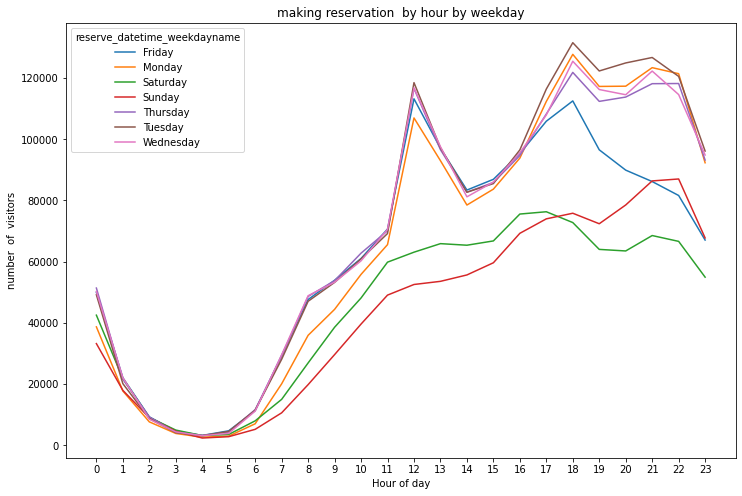

In [ ]:
ax=hpg_reserve.pivot_table(index=hpg_reserve['reserve_hour'],columns='reserve_datetime_weekdayname',values='reserve_visitors',aggfunc='sum').plot(figsize=(12,8),title='making reservation  by hour by weekday', xticks=np.arange(0, 24, 1))
ax.set_xlabel('Hour of day')
ax.set_ylabel('number  of  visitors')

**Observation**

**1)In all the days  starting  from Monday to  Sunday  the  inital  hours shows the  similar trend of  visitors till 7 oclock in the  morning and then shows  the  fluctuted  trend  till evening 6 oclock  and after that  there  is a  downward  trend  of visitors  till  the night 11 PM**

**2)On Monday, Friday and wednesday there is a  high  peak  of visitors  in between the afternoon 12:30PM to  evening  15:30 PM**

**Conclusion**

**The overall  conclusion  of  this  plot is  to show the  impact of each  weekday associated  with hour  on visitors numbers and  justify  the  rush hour of  the entire day of  the week.**

In [ ]:
hpg_reserve['visit_datetime_weekdayname'] = hpg_reserve['visit_datetime'].dt.day_name()
hpg_reserve.head()

,hpg_store_id,visit_datetime,reserve_datetime,reserve_visitors,hour,reserve_hour,difference_hour,Difference_days,month,reserve_datetime_weekdayname,visit_datetime_weekdayname
0,hpg_c63f6f42e088e50f,2016-01-01 11:00:00,2016-01-01 09:00:00,1,11,9,2,0,Jan,Friday,Friday
1,hpg_dac72789163a3f47,2016-01-01 13:00:00,2016-01-01 06:00:00,3,13,6,7,0,Jan,Friday,Friday
2,hpg_c8e24dcf51ca1eb5,2016-01-01 16:00:00,2016-01-01 14:00:00,2,16,14,2,0,Jan,Friday,Friday
3,hpg_24bb207e5fd49d4a,2016-01-01 17:00:00,2016-01-01 11:00:00,5,17,11,6,0,Jan,Friday,Friday
4,hpg_25291c542ebb3bc2,2016-01-01 17:00:00,2016-01-01 03:00:00,13,17,3,14,0,Jan,Friday,Friday


**Objective of the Analysis &plotting**

**1)The  objective  of  the  analysis  is to  show the  number of  visitors  by day  of  the  hour  of  weekday and make a decision  that  at which  hour  on a particular  day name how many number of visitors came  to  the restaurant and  take  the  food**

**2) This analysis  is based  on the  visit weekday name**

Text(0, 0.5, 'number  of  visitors')

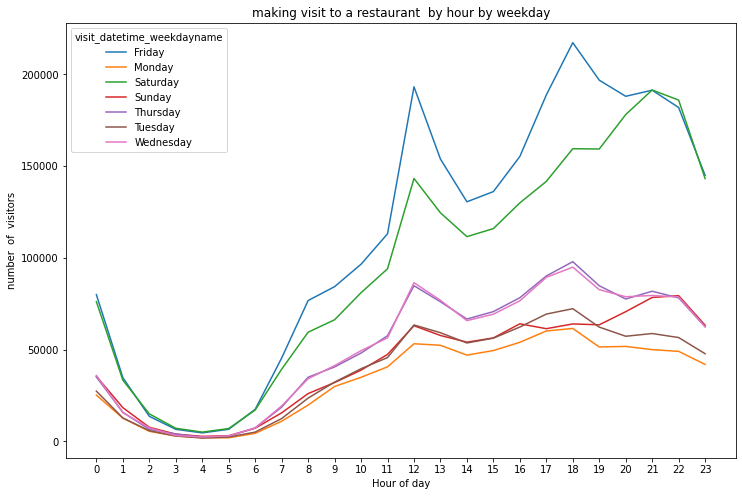

In [ ]:
ax=hpg_reserve.pivot_table(index=hpg_reserve['reserve_hour'],columns='visit_datetime_weekdayname',values='reserve_visitors',aggfunc='sum').plot(figsize=(12,8),title='making visit to a restaurant  by hour by weekday', xticks=np.arange(0, 24, 1))
ax.set_xlabel('Hour of day')
ax.set_ylabel('number  of  visitors')

**Observation**

**1)In all the days  starting  from Monday to  Sunday  the  inital  hours shows the  downward trend of  visitors till 7 oclock in the  morning and then shows  the  upward  trend  till afternoon  1 oclock  and after that  there  is a  fluctuated  trend  of visitors  till  the night 11 PM**

**2)On Saturday and Friday there is a  high  peak  of visitors  in between the afternoon 11:00PM to  afternoon  2:00 PM**

**Objective of the analysis&plotting**

**The  objective  of the analysis is to show  the number of reserved visitors  monthly.**

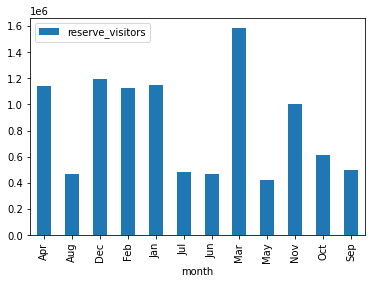

In [ ]:
monthly_reservation=hpg_reserve.groupby('month')['reserve_visitors'].sum()
monthly_reservation.head()
df1=pd.DataFrame(monthly_reservation)
df1.plot.bar()

**Observation**

**1)In the Month of March has the  highest reservation made  by visitors  and lowest in the month of  May  rservation made  by visitors**.

**2)From december of previous year to  the  April  there is increase  trend in the  reservation of visitors  after  it is  decreasing.**


**3)Seasonality  is  important in  the  monthly reserved visitors  based  on the festivals or  some  events  which needs  to  be  occur  on that day..**

**Conclusion**

**1)The  overall conclusion  of this plot is  to show the the reserved  visitors  amongst  the  month where some  of the months  has  the  highest  number of visitors  as  compared  to  other months due  to  seasonality  and festivals.**

**Objective of the analysis &plotting**

**The  objective of this analysis  is to  show the  bunch of  visitors  from year and  compared  against  each  year  for  more visitors  amongst  the  other.**

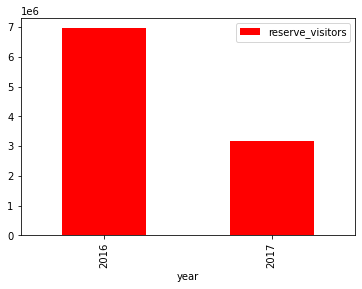

In [ ]:
hpg_reserve['year']=hpg_reserve['reserve_datetime'].dt.year
yearly_reservation=hpg_reserve.groupby('year')['reserve_visitors'].sum()
yerly_dataframe=pd.DataFrame(yearly_reservation)
yerly_dataframe.plot.bar(color='red')

**Observation**

**1)There are  more visitors  who made more reservation in 2016 as comapred  to  2017**

**AirStoreEDA(area&Genre)**

In [ ]:
air_store_info.head()




,air_store_id,air_genre_name,air_area_name,latitude,longitude
0,air_0f0cdeee6c9bf3d7,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852
1,air_7cc17a324ae5c7dc,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852
2,air_fee8dcf4d619598e,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852
3,air_a17f0778617c76e2,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852
4,air_83db5aff8f50478e,Italian/French,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599


**Count the numbe of restaurant  by genre_name**

**Objective of the analysis &plotting**

**1)The Objective of this analysis is to  show  the  number of  restaurant based on the genre in the particular area.**

**2)This analysis is useful  when the visitor  wants  to  eat  specific type  of  dish  from  the  particluar restaurants in their specific area.**


Text(0, 0.5, 'NUmber of  restaurant')

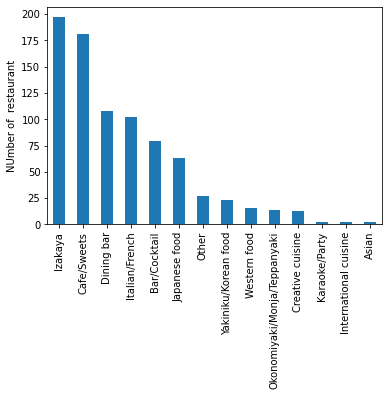

In [ ]:
df9=air_store_info.groupby('air_store_id')['air_genre_name'].sum().value_counts()
ax=df9.plot.bar()
ax.set_ylabel('NUmber of  restaurant')



**Observation**

**1)Izakya  has the  highest  number of  restaurant  followed  by Cafe/Sweets and Dining Bar , while  International cuisine  has  the  lowest  number  of restaurant.**

**2)This analysis  shows  the  preferences of  going  to the specific  type of restaurant by  the number of  their  branches  in the  particular area.**


**Merge The airvisit_df to  airstore  by air_store_id**

In [ ]:
#store_info = airvisit_df.copy()
#store_info = airvisit_df.merge(air_store_info,on = "air_store_id", how = 'inner')
#print(store_info['air_store_id'].nunique())
#store_info.head()
#df['air_store_id'].nunique()
df_merge=pd.DataFrame(df)
df_merge.head(2)

,air_store_id,visit_date,visitors,air_genre_name,air_area_name,latitude,longitude
0,air_00a91d42b08b08d9,2016-07-01,35,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595
1,air_00a91d42b08b08d9,2016-07-02,9,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595


**Split the area name into  3  areas  like area1, area2, area3**

In [ ]:
df_merge['area1'],df_merge['area2'],df_merge['area3']=df_merge['air_area_name'].str.split(' ',2).str
df_merge.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  """Entry point for launching an IPython kernel.


,air_store_id,visit_date,visitors,air_genre_name,air_area_name,latitude,longitude,area1,area2,area3
0,air_00a91d42b08b08d9,2016-07-01,35,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595,Tōkyō-to,Chiyoda-ku,Kudanminami
1,air_00a91d42b08b08d9,2016-07-02,9,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595,Tōkyō-to,Chiyoda-ku,Kudanminami
2,air_00a91d42b08b08d9,2016-07-04,20,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595,Tōkyō-to,Chiyoda-ku,Kudanminami
3,air_00a91d42b08b08d9,2016-07-05,25,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595,Tōkyō-to,Chiyoda-ku,Kudanminami
4,air_00a91d42b08b08d9,2016-07-06,29,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595,Tōkyō-to,Chiyoda-ku,Kudanminami


In [ ]:
area1 = df_merge.groupby("area1")["visitors"].mean().reset_index()
area1.head()

,area1,visitors
0,Fukuoka-ken,20.434758
1,Hiroshima-ken,21.822986
2,Hokkaidō,21.114745
3,Hyōgo-ken,23.284209
4,Miyagi-ken,20.463668


In [ ]:
area2=df_merge.groupby('area2')['visitors'].mean().reset_index()
area2.head()


,area2,visitors
0,Abashiri-shi,28.844828
1,Adachi-ku,27.075547
2,Amagasaki-shi,32.338462
3,Asahikawa-shi,23.404226
4,Bunkyō-ku,21.094005


In [ ]:
area3=df_merge.groupby('area3')['visitors'].mean().reset_index()
area3.head()


,area3,visitors
0,6 Jōdōri,23.404226
1,Akasaka,23.535158
2,Aramotokita,11.064246
3,Asagayaminami,17.370677
4,Asakusa,25.829694


**Objective of the analysis &plotting**

**1)The objective of this  analysis to  see  the  number of mean visitors  by the preferences of genre**

**2)This analysis is  useful  for the restaurant managers to  get  an  idea of  preparing  the  specific  type of food  in particular  quatity based  on the  visitors.**

**Count the  Mean visitors by the  Genre**

Text(0.5, 1.0, 'mean visitors by genre')

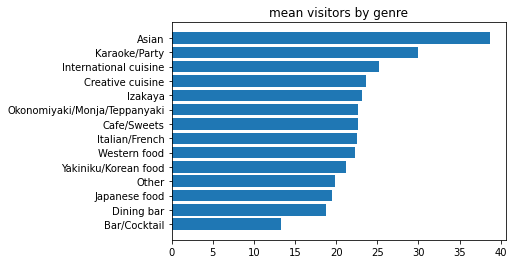

In [ ]:
mean_visitors_by_genre_name=df_merge.groupby('air_genre_name')['visitors'].mean().sort_values()
plt.barh(mean_visitors_by_genre_name.index,mean_visitors_by_genre_name)
plt.title('mean visitors by genre')

**Observation**

**The most  prefrence of the genre of  visitors is Asian folllowed by Westernfood and Cafe/Sweets and Bar/Coktail is  not  the  interest  of visitors.**

**Here the Season(Winter, Summer,Rainy) is  most important factor  for viistors  to  decide  which  food needs  to  eat and based  on the visitor preferences  the restaurant  owner made  the  food  available in within  the  particular hours.** 

**Count the Mean visitors  by AreaNames**

**Objective of the analysis &plotting**

**1)The objective of this analysis is to show the  mean visitors  by the  area names  of the restaurants in which the  visitors are visiting.**

Text(0.5, 1.0, 'mean visitors by area1')

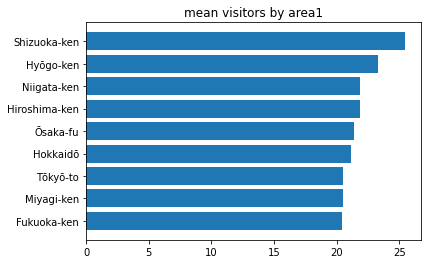

In [ ]:
mean_visitors_by_area_name=df_merge.groupby('area1')['visitors'].mean().sort_values()
plt.barh(mean_visitors_by_area_name.index,mean_visitors_by_area_name)
plt.title('mean visitors by area1')

**Observation**

**The most number of  visitors visits  in the  Shizuoka-ken followed by the  Osaka-fu and  Hiroshima-ken and  the  less  number of  visitor in the  Nigata-ken location**

**Here distance  of the  restaurant from the  visitors  home  are matters based  on the Weather condition.**

**Count the Top 10 visitors by genreName**

**Objective of the analysis &plotting**

**The Objective of this  analysis to show the  number of top  visitors by their prefernces  of  eating  food.**

Text(0.5, 1.0, 'Top 10 Visitors  by Genre')

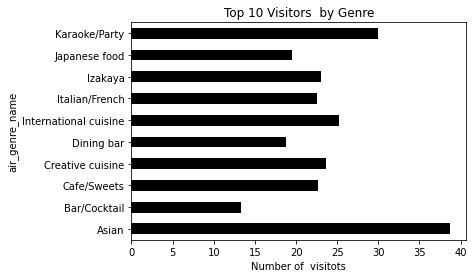

In [ ]:
ax11=df_merge.groupby('air_genre_name')['visitors'].mean()[:10].plot(kind='barh',color='black')
ax11.set_xlabel('Number of  visitots')
ax11.set_title('Top 10 Visitors  by Genre')


**Observation**

**In the Top 10  categories  Asian  is the  hottest  genre amongst the other , which is  Cafe/Sweets &Izakya and Bar/Cocktail is  the  less  choice  of the  Visitors in  this category**

**Count the top 10 mean   Visitors based  on areas(area1, area2, area3)**

Text(0.5, 1.0, 'Top 10 Visitors  by area1')

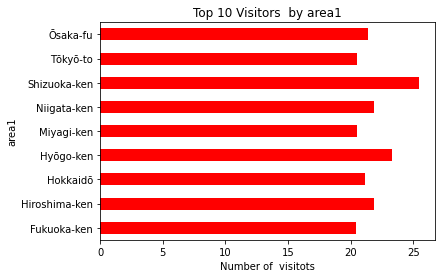

In [ ]:
ax12=df_merge.groupby('area1')['visitors'].mean()[:10].plot(kind='barh',color='red')
ax12.set_xlabel('Number of  visitots')
ax12.set_title('Top 10 Visitors  by area1')

Text(0.5, 1.0, 'Top 10 Visitors  by area2')

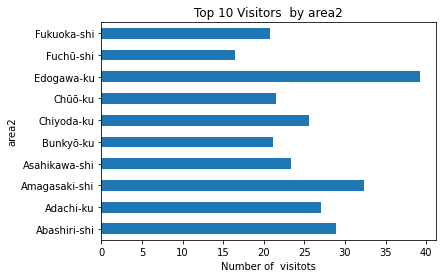

In [ ]:
ax13=df_merge.groupby('area2')['visitors'].mean()[:10].plot(kind='barh')
ax13.set_xlabel('Number of  visitots')
ax13.set_title('Top 10 Visitors  by area2')

Text(0.5, 1.0, 'Top 10 Visitors  by area3')

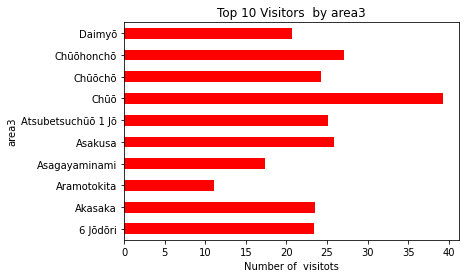

In [ ]:
ax14=df_merge.groupby('area3')['visitors'].mean()[:10].plot(kind='barh',color='red')
ax14.set_xlabel('Number of  visitots')
ax14.set_title('Top 10 Visitors  by area3')

**Observations**

**In the  top ten categories  of Mean visitors  by area1, Shizuoka-ken is  the  hottest area amongst  the other , which are  followed  by Osaka-fu &Hyongo-ken**

**In the  top ten categories  of Mean visitors  by area2, Adachi-ku is  the  hottest area amongst  the other , which are  followed  by Abashiri-shi &Chiyoda-ku**

**In the  top ten categories  of Mean visitors  by area3, Chuohoncho is  the  hottest area amongst  the other , which are  followed  by Fuminosato &Akaska**

In [ ]:
hpg_store_info_df.head()

,hpg_store_id,hpg_genre_name,hpg_area_name,latitude,longitude
0,hpg_6622b62385aec8bf,Japanese style,Tōkyō-to Setagaya-ku Taishidō,35.643675,139.668221
1,hpg_e9e068dd49c5fa00,Japanese style,Tōkyō-to Setagaya-ku Taishidō,35.643675,139.668221
2,hpg_2976f7acb4b3a3bc,Japanese style,Tōkyō-to Setagaya-ku Taishidō,35.643675,139.668221
3,hpg_e51a522e098f024c,Japanese style,Tōkyō-to Setagaya-ku Taishidō,35.643675,139.668221
4,hpg_e3d0e1519894f275,Japanese style,Tōkyō-to Setagaya-ku Taishidō,35.643675,139.668221


**Count the Number of Hpg restaurants  based on the Genre name**

Text(0, 0.5, '# of hpg restaurant by Genre_name')

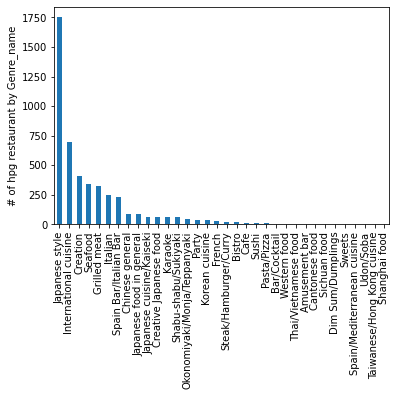

In [ ]:
hpg_restaurant_by_Genre_name=hpg_store_info_df.groupby('hpg_store_id')['hpg_genre_name'].sum().value_counts()
ax8=hpg_restaurant_by_Genre_name.plot.bar()
ax8.set_ylabel('# of hpg restaurant by Genre_name')


**Observation**

**1)Japanese style has the  highest  number of the restaurants followed by the  International cuisine and creation**

**2)There are  number of Genres who has either a  less restaurants or no  restaurants.**


In [ ]:
#date_info.head()
date_info=date_info.rename(columns={'calendar_date':'visit_date'})
date_info.visit_date=pd.to_datetime(date_info.visit_date)

Text(0, 0.5, 'visitors')

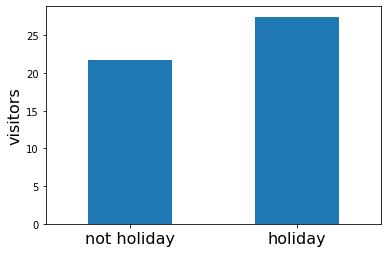

In [ ]:
#date_info=date_info.rename(columns={'calendar_date':'visit_date'})
air_visit_holiday=airvisit_df.merge(date_info, on='visit_date', how='inner')
holiday_days=air_visit_holiday.groupby('holiday_flg')['visitors'].mean()
holiday_days.index=['not holiday','holiday']
holiday_days.plot(kind='bar')
plt.xticks(rotation = 'horizontal', fontsize = 16)
plt.ylabel('visitors', fontsize =16)

**Observations**

**There are  more number of  visitors on holiday days  then the  nonholiday  days.**

**Conclusion**



In [ ]:
air_reserve.head()

,air_store_id,visit_datetime,reserve_datetime,reserve_visitors,hour,reserve_hour,difference_hour,Difference,month,reserve_datetime_weekdayname,visit_datetime_weekdayname,year
0,air_877f79706adbfb06,2016-01-01 19:00:00,2016-01-01 16:00:00,1,19,16,3,0,Jan,Friday,Friday,2016
1,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,3,19,19,0,0,Jan,Friday,Friday,2016
2,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,6,19,19,0,0,Jan,Friday,Friday,2016
3,air_877f79706adbfb06,2016-01-01 20:00:00,2016-01-01 16:00:00,2,20,16,4,0,Jan,Friday,Friday,2016
4,air_db80363d35f10926,2016-01-01 20:00:00,2016-01-01 01:00:00,5,20,1,19,0,Jan,Friday,Friday,2016


**Feature Engineering**

**1):total  visitors that  are  visits to a  restaurants by the each weekdays:**

**this feature is helpful to  determine the total number of  Visitors  on each  week day i.e from(Mon to Sat) by all the  stores**

In [ ]:
tm5=air_reserve.groupby(['reserve_datetime_weekdayname'])[['reserve_visitors']].sum().rename(columns={'reserve_datetime_weekdayname':'Day of the week','reserve_visitors':'Total_visitors_Day_of_week'})
tm5


,Total_visitors_Day_of_week
reserve_datetime_weekdayname,
Friday,64025
Monday,57381
Saturday,49263
Sunday,36943
Thursday,68929
Tuesday,69197
Wednesday,68277


In [ ]:
air_reserve['visit_datetime']=pd.to_datetime(air_reserve['visit_datetime'])
tm1=air_reserve.groupby(['air_store_id','visit_datetime'],as_index=False)['reserve_visitors'].sum().rename(columns={'visit_datetime':'visit_date','reserve_visitors':'Total_visitors_by_date'})
tm2=air_reserve.groupby(['air_store_id','visit_datetime'],as_index=False)['reserve_visitors'].min().rename(columns={'visit_datetime':'visit_date','reserve_visitors':'Total_min_visitors_by_date'})
tm3=air_reserve.groupby(['air_store_id','visit_datetime'],as_index=False)['reserve_visitors'].max().rename(columns={'visit_datetime':'visit_date','reserve_visitors':'Total_max_visitors_by_date'})
m1=pd.merge(tm1,tm2,on=['air_store_id','visit_date'])
m2=pd.merge(m1,tm3,on=['air_store_id','visit_date'])

In [ ]:
air_reserve.head()

,air_store_id,visit_datetime,reserve_datetime,reserve_visitors,hour,reserve_hour,difference_hour,Difference,month,reserve_datetime_weekdayname,visit_datetime_weekdayname,year
0,air_877f79706adbfb06,2016-01-01 19:00:00,2016-01-01 16:00:00,1,19,16,3,0,Jan,Friday,Friday,2016
1,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,3,19,19,0,0,Jan,Friday,Friday,2016
2,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,6,19,19,0,0,Jan,Friday,Friday,2016
3,air_877f79706adbfb06,2016-01-01 20:00:00,2016-01-01 16:00:00,2,20,16,4,0,Jan,Friday,Friday,2016
4,air_db80363d35f10926,2016-01-01 20:00:00,2016-01-01 01:00:00,5,20,1,19,0,Jan,Friday,Friday,2016


**2)Total Number of visitors by per store  and per  day  of  week in air:**

**this feature is helpful to  determine the total number of  Visitors  on each  This feature  is helpful for determine  the number of  visitors by each  and every store and also  from  each  week day i.e from(Mon to Sat) by all the  stores**

In [ ]:
tmp1 = air_reserve.groupby(['air_store_id','reserve_datetime_weekdayname'], as_index=False)[ 'reserve_visitors'].sum().rename(columns={'reserve_datetime_weekdayname':'day_of_week',  'reserve_visitors':'Total_visitors_by_wk_id_air'})

In [ ]:
tmp1


,air_store_id,day_of_week,Total_visitors_by_wk_id_air
0,air_00a91d42b08b08d9,Monday,11
1,air_00a91d42b08b08d9,Saturday,3
2,air_00a91d42b08b08d9,Sunday,8
3,air_00a91d42b08b08d9,Thursday,32
4,air_00a91d42b08b08d9,Tuesday,16
...,...,...,...
1820,air_fea5dc9594450608,Thursday,86
1821,air_fea5dc9594450608,Tuesday,86
1822,air_fea5dc9594450608,Wednesday,69
1823,air_fee8dcf4d619598e,Friday,3


In [ ]:
air_reserve['Total_visitors_by_wk_id_air']=tmp1['Total_visitors_by_wk_id_air']


**3)Total Number of Min visitors by per store  and per  day  of  week in air:**

**This feature  is helpful for determine  the number of Min  visitors by each  and every store and also  from  each  week day i.e from(Mon to Sat) by all the  stores**

In [ ]:
tmp2=air_reserve.groupby(['air_store_id','reserve_datetime_weekdayname'], as_index=False)[ 'reserve_visitors'].min().rename(columns={'reserve_datetime_weekdayname':'day_of_week',  'reserve_visitors':'Total_min_visitors_by_wk_id_air'})

In [ ]:
tmp2

,air_store_id,day_of_week,Total_min_visitors_by_wk_id_air
0,air_00a91d42b08b08d9,Monday,2
1,air_00a91d42b08b08d9,Saturday,3
2,air_00a91d42b08b08d9,Sunday,2
3,air_00a91d42b08b08d9,Thursday,2
4,air_00a91d42b08b08d9,Tuesday,4
...,...,...,...
1820,air_fea5dc9594450608,Thursday,2
1821,air_fea5dc9594450608,Tuesday,2
1822,air_fea5dc9594450608,Wednesday,2
1823,air_fee8dcf4d619598e,Friday,3


In [ ]:
air_reserve['Total_min_visitors_by_wk_id_air']=tmp2['Total_min_visitors_by_wk_id_air']

**Merge the two dataframe**

In [ ]:
tmp3=pd.merge(tmp1, tmp2,how='inner',on=['air_store_id','day_of_week'])
t1=pd.DataFrame(tmp3)

**4)Total Number of  maximum visitors by per store  and per  day  of  week in air:**

**This feature  is helpful for determine  the number of maximum visitors by each  and every store and also  from  each  week day i.e from(Mon to Sat) by all the  stores**

In [ ]:
tmp4=air_reserve.groupby(['air_store_id','reserve_datetime_weekdayname'], as_index=False)[ 'reserve_visitors'].min().rename(columns={'reserve_datetime_weekdayname':'day_of_week',  'reserve_visitors':'Total_max_visitors_by_wk_id__air'})
tmp4

,air_store_id,day_of_week,Total_max_visitors_by_wk_id__air
0,air_00a91d42b08b08d9,Monday,2
1,air_00a91d42b08b08d9,Saturday,3
2,air_00a91d42b08b08d9,Sunday,2
3,air_00a91d42b08b08d9,Thursday,2
4,air_00a91d42b08b08d9,Tuesday,4
...,...,...,...
1820,air_fea5dc9594450608,Thursday,2
1821,air_fea5dc9594450608,Tuesday,2
1822,air_fea5dc9594450608,Wednesday,2
1823,air_fee8dcf4d619598e,Friday,3


In [ ]:
air_reserve['Total_max_visitors_by_wk_id__air']=tmp4['Total_max_visitors_by_wk_id__air']

**Merge the two dataframe for  final Merge**

In [ ]:
final_t1=pd.merge(t1,tmp4,how='inner',on=['air_store_id','day_of_week'])
final_t1

,air_store_id,day_of_week,Total_visitors_by_wk_id_air,Total_min_visitors_by_wk_id_air,Total_max_visitors_by_wk_id__air
0,air_00a91d42b08b08d9,Monday,11,2,2
1,air_00a91d42b08b08d9,Saturday,3,3,3
2,air_00a91d42b08b08d9,Sunday,8,2,2
3,air_00a91d42b08b08d9,Thursday,32,2,2
4,air_00a91d42b08b08d9,Tuesday,16,4,4
...,...,...,...,...,...
1820,air_fea5dc9594450608,Thursday,86,2,2
1821,air_fea5dc9594450608,Tuesday,86,2,2
1822,air_fea5dc9594450608,Wednesday,69,2,2
1823,air_fee8dcf4d619598e,Friday,3,3,3


In [ ]:
final_1_merge=pd.merge(m2,final_t1,on=['air_store_id'])
final_1_merge.head()

,air_store_id,visit_date,Total_visitors_by_date,Total_min_visitors_by_date,Total_max_visitors_by_date,day_of_week,Total_visitors_by_wk_id_air,Total_min_visitors_by_wk_id_air,Total_max_visitors_by_wk_id__air
0,air_00a91d42b08b08d9,2016-10-31 20:00:00,2,2,2,Monday,11,2,2
1,air_00a91d42b08b08d9,2016-10-31 20:00:00,2,2,2,Saturday,3,3,3
2,air_00a91d42b08b08d9,2016-10-31 20:00:00,2,2,2,Sunday,8,2,2
3,air_00a91d42b08b08d9,2016-10-31 20:00:00,2,2,2,Thursday,32,2,2
4,air_00a91d42b08b08d9,2016-10-31 20:00:00,2,2,2,Tuesday,16,4,4


In [ ]:
air_reserve.head()

,air_store_id,visit_datetime,reserve_datetime,reserve_visitors,hour,reserve_hour,difference_hour,Difference,month,reserve_datetime_weekdayname,visit_datetime_weekdayname,year,Total_visitors_by_wk_id_air,Total_min_visitors_by_wk_id_air,Total_max_visitors_by_wk_id__air
0,air_877f79706adbfb06,2016-01-01 19:00:00,2016-01-01 16:00:00,1,19,16,3,0,Jan,Friday,Friday,2016,11.0,2.0,2.0
1,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,3,19,19,0,0,Jan,Friday,Friday,2016,3.0,3.0,3.0
2,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,6,19,19,0,0,Jan,Friday,Friday,2016,8.0,2.0,2.0
3,air_877f79706adbfb06,2016-01-01 20:00:00,2016-01-01 16:00:00,2,20,16,4,0,Jan,Friday,Friday,2016,32.0,2.0,2.0
4,air_db80363d35f10926,2016-01-01 20:00:00,2016-01-01 01:00:00,5,20,1,19,0,Jan,Friday,Friday,2016,16.0,4.0,4.0


**5)Total Number of  visitors by per store  and  differnce  of  hours between(visit_datetime-Reserved_datetime) in air:**

**This feature  is helpful for determine  the  Total number of  visitors 
by each  and every store and also  from  each Hour difference**

In [ ]:
tmp5=air_reserve.groupby(['air_store_id','difference_hour'], as_index=False)[ 'reserve_visitors'].sum().rename(columns={'difference_hour':'difference_hour',  'reserve_visitors':'Total_visitors_by_hour__air'})
tmp5

,air_store_id,difference_hour,Total_visitors_by_hour__air
0,air_00a91d42b08b08d9,-1,12
1,air_00a91d42b08b08d9,3,6
2,air_00a91d42b08b08d9,4,20
3,air_00a91d42b08b08d9,5,2
4,air_00a91d42b08b08d9,9,18
...,...,...,...
5870,air_fea5dc9594450608,16,2
5871,air_fea5dc9594450608,18,8
5872,air_fea5dc9594450608,19,5
5873,air_fee8dcf4d619598e,3,3


In [ ]:
air_reserve['Total_visitors_by_hour__air']=tmp5['Total_visitors_by_hour__air']

**6)Min Number of  visitors by per store  and  differnce  of  hours between(visit_datetime-Reserved_datetime) in air:**

**This feature  is helpful for determine  the  Min number of  visitors 
by each  and every store and also  from  each Hour difference**

In [ ]:
tmp6=air_reserve.groupby(['air_store_id','difference_hour'], as_index=False)[ 'reserve_visitors'].min().rename(columns={'difference_hour':'difference_hour',  'reserve_visitors':'Total_min_visitors_by_hour__air'})
tmp6

,air_store_id,difference_hour,Total_min_visitors_by_hour__air
0,air_00a91d42b08b08d9,-1,12
1,air_00a91d42b08b08d9,3,2
2,air_00a91d42b08b08d9,4,2
3,air_00a91d42b08b08d9,5,2
4,air_00a91d42b08b08d9,9,18
...,...,...,...
5870,air_fea5dc9594450608,16,2
5871,air_fea5dc9594450608,18,2
5872,air_fea5dc9594450608,19,2
5873,air_fee8dcf4d619598e,3,3


In [ ]:
air_reserve['Total_min_visitors_by_hour__air']=tmp6['Total_min_visitors_by_hour__air']

**7)Max Number of  visitors by per store  and  differnce  of  hours between(visit_datetime-Reserved_datetime) in air:**

**This feature  is helpful for determine  the  Max number of  visitors 
by each  and every store and also  from  each Hour difference**

In [ ]:
tmp7=air_reserve.groupby(['air_store_id','difference_hour'], as_index=False)[ 'reserve_visitors'].max().rename(columns={'difference_hour':'difference_hour',  'reserve_visitors':'Total_max_visitors_by_hour__air'})
tmp7

,air_store_id,difference_hour,Total_max_visitors_by_hour__air
0,air_00a91d42b08b08d9,-1,12
1,air_00a91d42b08b08d9,3,4
2,air_00a91d42b08b08d9,4,9
3,air_00a91d42b08b08d9,5,2
4,air_00a91d42b08b08d9,9,18
...,...,...,...
5870,air_fea5dc9594450608,16,2
5871,air_fea5dc9594450608,18,6
5872,air_fea5dc9594450608,19,3
5873,air_fee8dcf4d619598e,3,3


In [ ]:
air_reserve['Total_max_visitors_by_hour__air']=tmp7['Total_max_visitors_by_hour__air']

**Merge Two dataFrame**

In [ ]:
#final_t2=pd.merge()
tmp9=pd.merge(tmp5, tmp6,how='inner',on=['air_store_id','difference_hour'])
t2=pd.DataFrame(tmp9)
t2

,air_store_id,difference_hour,Total_visitors_by_hour__air,Total_min_visitors_by_hour__air
0,air_00a91d42b08b08d9,-1,12,12
1,air_00a91d42b08b08d9,3,6,2
2,air_00a91d42b08b08d9,4,20,2
3,air_00a91d42b08b08d9,5,2,2
4,air_00a91d42b08b08d9,9,18,18
...,...,...,...,...
5870,air_fea5dc9594450608,16,2,2
5871,air_fea5dc9594450608,18,8,2
5872,air_fea5dc9594450608,19,5,2
5873,air_fee8dcf4d619598e,3,3,3


**Final Merge**

In [ ]:
final_t2=pd.merge(t2,tmp7,how='inner',on=['air_store_id','difference_hour'])
final_t2

,air_store_id,difference_hour,Total_visitors_by_hour__air,Total_min_visitors_by_hour__air,Total_max_visitors_by_hour__air
0,air_00a91d42b08b08d9,-1,12,12,12
1,air_00a91d42b08b08d9,3,6,2,4
2,air_00a91d42b08b08d9,4,20,2,9
3,air_00a91d42b08b08d9,5,2,2,2
4,air_00a91d42b08b08d9,9,18,18,18
...,...,...,...,...,...
5870,air_fea5dc9594450608,16,2,2,2
5871,air_fea5dc9594450608,18,8,2,6
5872,air_fea5dc9594450608,19,5,2,3
5873,air_fee8dcf4d619598e,3,3,3,3


In [ ]:
#final_merge=pd.concat([final_1_merge, final_t2],ignore_index=False)
final_merge=pd.merge(final_1_merge,final_t2,on=['air_store_id'])
final_merge.head()

,air_store_id,visit_date,Total_visitors_by_date,Total_min_visitors_by_date,Total_max_visitors_by_date,day_of_week,Total_visitors_by_wk_id_air,Total_min_visitors_by_wk_id_air,Total_max_visitors_by_wk_id__air,difference_hour,Total_visitors_by_hour__air,Total_min_visitors_by_hour__air,Total_max_visitors_by_hour__air
0,air_00a91d42b08b08d9,2016-10-31 20:00:00,2,2,2,Monday,11,2,2,-1,12,12,12
1,air_00a91d42b08b08d9,2016-10-31 20:00:00,2,2,2,Monday,11,2,2,3,6,2,4
2,air_00a91d42b08b08d9,2016-10-31 20:00:00,2,2,2,Monday,11,2,2,4,20,2,9
3,air_00a91d42b08b08d9,2016-10-31 20:00:00,2,2,2,Monday,11,2,2,5,2,2,2
4,air_00a91d42b08b08d9,2016-10-31 20:00:00,2,2,2,Monday,11,2,2,9,18,18,18


In [ ]:
final_merge.head()


,air_store_id,visit_date,Total_visitors_by_date,Total_min_visitors_by_date,Total_max_visitors_by_date,day_of_week,Total_visitors_by_wk_id_air,Total_min_visitors_by_wk_id_air,Total_max_visitors_by_wk_id__air,difference_hour,Total_visitors_by_hour__air,Total_min_visitors_by_hour__air,Total_max_visitors_by_hour__air
0,air_00a91d42b08b08d9,2016-10-31 20:00:00,2,2,2,Monday,11,2,2,-1,12,12,12
1,air_00a91d42b08b08d9,2016-10-31 20:00:00,2,2,2,Monday,11,2,2,3,6,2,4
2,air_00a91d42b08b08d9,2016-10-31 20:00:00,2,2,2,Monday,11,2,2,4,20,2,9
3,air_00a91d42b08b08d9,2016-10-31 20:00:00,2,2,2,Monday,11,2,2,5,2,2,2
4,air_00a91d42b08b08d9,2016-10-31 20:00:00,2,2,2,Monday,11,2,2,9,18,18,18


**8)Total Number of  visitors by per store  and  differnce  of  days between(visit_datetime-Reserved_datetime) in air:**

**This feature  is helpful for determine  the  Total number of  visitors 
by each  and every store and also  from  each day difference**

In [ ]:
tmp11 = air_reserve.groupby(['air_store_id','Difference'], as_index=False)[ 'reserve_visitors'].sum().rename(columns={'Difference':'Difference_days',  'reserve_visitors':'Total_visitors_by_day_air'})
tmp11

,air_store_id,Difference_days,Total_visitors_by_day_air
0,air_00a91d42b08b08d9,0,6
1,air_00a91d42b08b08d9,1,14
2,air_00a91d42b08b08d9,2,6
3,air_00a91d42b08b08d9,4,9
4,air_00a91d42b08b08d9,5,12
...,...,...,...
8003,air_fea5dc9594450608,52,11
8004,air_fea5dc9594450608,56,7
8005,air_fea5dc9594450608,61,6
8006,air_fee8dcf4d619598e,3,3


In [ ]:
air_reserve['Total_visitors_by_day_air']=tmp11['Total_visitors_by_day_air']

**9)Min Number of  visitors by per store  and  differnce  of  days between(visit_datetime-Reserved_datetime):**

**This feature  is helpful for determine  the  Min number of  visitors 
by each  and every store and also  from  each day difference**

In [ ]:
tmp12 = air_reserve.groupby(['air_store_id','Difference'], as_index=False)[ 'reserve_visitors'].min().rename(columns={'Difference':'Difference_days',  'reserve_visitors':'Total_min_visitors_by_day_air'})
tmp12

,air_store_id,Difference_days,Total_min_visitors_by_day_air
0,air_00a91d42b08b08d9,0,2
1,air_00a91d42b08b08d9,1,2
2,air_00a91d42b08b08d9,2,2
3,air_00a91d42b08b08d9,4,9
4,air_00a91d42b08b08d9,5,3
...,...,...,...
8003,air_fea5dc9594450608,52,11
8004,air_fea5dc9594450608,56,7
8005,air_fea5dc9594450608,61,6
8006,air_fee8dcf4d619598e,3,3


In [ ]:
air_reserve['Total_min_visitors_by_day_air']=tmp12['Total_min_visitors_by_day_air']

**10)Max Number of  visitors by per store  and  differnce  of  days between(visit_datetime-Reserved_datetime):**

**This feature  is helpful for determine  the  Maximum number of  visitors 
by each  and every store and also  from  each day difference**

In [ ]:
tmp13 = air_reserve.groupby(['air_store_id','Difference'], as_index=False)[ 'reserve_visitors'].max().rename(columns={'Difference':'Difference_days',  'reserve_visitors':'Total_max_visitors_by_day_air'})
tmp13

,air_store_id,Difference_days,Total_max_visitors_by_day_air
0,air_00a91d42b08b08d9,0,4
1,air_00a91d42b08b08d9,1,12
2,air_00a91d42b08b08d9,2,4
3,air_00a91d42b08b08d9,4,9
4,air_00a91d42b08b08d9,5,9
...,...,...,...
8003,air_fea5dc9594450608,52,11
8004,air_fea5dc9594450608,56,7
8005,air_fea5dc9594450608,61,6
8006,air_fee8dcf4d619598e,3,3


In [ ]:
air_reserve['Total_max_visitors_by_day_air']=tmp13['Total_max_visitors_by_day_air']

**Merge The dataframe**

In [ ]:
t11=pd.merge(tmp11, tmp12,on=['air_store_id','Difference_days'],how='inner')
t12=pd.DataFrame(t11)
t12

,air_store_id,Difference_days,Total_visitors_by_day_air,Total_min_visitors_by_day_air
0,air_00a91d42b08b08d9,0,6,2
1,air_00a91d42b08b08d9,1,14,2
2,air_00a91d42b08b08d9,2,6,2
3,air_00a91d42b08b08d9,4,9,9
4,air_00a91d42b08b08d9,5,12,3
...,...,...,...,...
8003,air_fea5dc9594450608,52,11,11
8004,air_fea5dc9594450608,56,7,7
8005,air_fea5dc9594450608,61,6,6
8006,air_fee8dcf4d619598e,3,3,3


In [ ]:
pip install dask[dataframe]

In [ ]:
import dask.dataframe as dd
final_t3=dd.merge(t12,tmp13,on=['air_store_id','Difference_days'])
f1=pd.DataFrame(final_t3)
f1.head(2)


,air_store_id,Difference_days,Total_visitors_by_day_air,Total_min_visitors_by_day_air,Total_max_visitors_by_day_air
0,air_00a91d42b08b08d9,0,6,2,4
1,air_00a91d42b08b08d9,1,14,2,12


In [ ]:
f1=f1.drop(columns=['air_store_id'])

In [ ]:
d1=dd.concat([final_merge,f1],axis=1)

d1.head()


,air_store_id,visit_date,Total_visitors_by_date,Total_min_visitors_by_date,Total_max_visitors_by_date,day_of_week,Total_visitors_by_wk_id_air,Total_min_visitors_by_wk_id_air,Total_max_visitors_by_wk_id__air,difference_hour,Total_visitors_by_hour__air,Total_min_visitors_by_hour__air,Total_max_visitors_by_hour__air,Difference_days,Total_visitors_by_day_air,Total_min_visitors_by_day_air,Total_max_visitors_by_day_air
0,air_00a91d42b08b08d9,2016-10-31 20:00:00,2,2,2,Monday,11,2,2,-1,12,12,12,0,6,2,4
1,air_00a91d42b08b08d9,2016-10-31 20:00:00,2,2,2,Monday,11,2,2,3,6,2,4,1,14,2,12
2,air_00a91d42b08b08d9,2016-10-31 20:00:00,2,2,2,Monday,11,2,2,4,20,2,9,2,6,2,4
3,air_00a91d42b08b08d9,2016-10-31 20:00:00,2,2,2,Monday,11,2,2,5,2,2,2,4,9,9,9
4,air_00a91d42b08b08d9,2016-10-31 20:00:00,2,2,2,Monday,11,2,2,9,18,18,18,5,12,3,9


In [ ]:
air_reserve.head()

,air_store_id,visit_datetime,reserve_datetime,reserve_visitors,hour,reserve_hour,difference_hour,Difference,month,reserve_datetime_weekdayname,visit_datetime_weekdayname,year,Total_visitors_by_wk_id_air,Total_min_visitors_by_wk_id_air,Total_max_visitors_by_wk_id__air,Total_visitors_by_hour__air,Total_min_visitors_by_hour__air,Total_max_visitors_by_hour__air,Total_visitors_by_day_air,Total_min_visitors_by_day_air,Total_max_visitors_by_day_air
0,air_877f79706adbfb06,2016-01-01 19:00:00,2016-01-01 16:00:00,1,19,16,3,0,Jan,Friday,Friday,2016,11.0,2.0,2.0,12.0,12.0,12.0,6.0,2.0,4.0
1,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,3,19,19,0,0,Jan,Friday,Friday,2016,3.0,3.0,3.0,6.0,2.0,4.0,14.0,2.0,12.0
2,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,6,19,19,0,0,Jan,Friday,Friday,2016,8.0,2.0,2.0,20.0,2.0,9.0,6.0,2.0,4.0
3,air_877f79706adbfb06,2016-01-01 20:00:00,2016-01-01 16:00:00,2,20,16,4,0,Jan,Friday,Friday,2016,32.0,2.0,2.0,2.0,2.0,2.0,9.0,9.0,9.0
4,air_db80363d35f10926,2016-01-01 20:00:00,2016-01-01 01:00:00,5,20,1,19,0,Jan,Friday,Friday,2016,16.0,4.0,4.0,18.0,18.0,18.0,12.0,3.0,9.0


In [ ]:
air_reserve_merge=dd.concat([final_merge,f1],axis=1)
air_reserve_merge.head()


,air_store_id,visit_date,Total_visitors_by_date,Total_min_visitors_by_date,Total_max_visitors_by_date,day_of_week,Total_visitors_by_wk_id_air,Total_min_visitors_by_wk_id_air,Total_max_visitors_by_wk_id__air,difference_hour,Total_visitors_by_hour__air,Total_min_visitors_by_hour__air,Total_max_visitors_by_hour__air,Difference_days,Total_visitors_by_day_air,Total_min_visitors_by_day_air,Total_max_visitors_by_day_air
0,air_00a91d42b08b08d9,2016-10-31 20:00:00,2,2,2,Monday,11,2,2,-1,12,12,12,0,6,2,4
1,air_00a91d42b08b08d9,2016-10-31 20:00:00,2,2,2,Monday,11,2,2,3,6,2,4,1,14,2,12
2,air_00a91d42b08b08d9,2016-10-31 20:00:00,2,2,2,Monday,11,2,2,4,20,2,9,2,6,2,4
3,air_00a91d42b08b08d9,2016-10-31 20:00:00,2,2,2,Monday,11,2,2,5,2,2,2,4,9,9,9
4,air_00a91d42b08b08d9,2016-10-31 20:00:00,2,2,2,Monday,11,2,2,9,18,18,18,5,12,3,9


In [ ]:
hpg_reserve=pd.merge(hpg_reserve,store_id_df, on=['hpg_store_id'])
hpg_reserve.head(2)

,hpg_store_id,visit_datetime,reserve_datetime,reserve_visitors,hour,reserve_hour,difference_hour,Difference_days,month,reserve_datetime_weekdayname,visit_datetime_weekdayname,year,air_store_id
0,hpg_878cc70b1abc76f7,2016-01-01 19:00:00,2016-01-01 15:00:00,4,19,15,4,0,Jan,Friday,Friday,2016,air_db80363d35f10926
1,hpg_878cc70b1abc76f7,2016-01-02 19:00:00,2016-01-02 14:00:00,2,19,14,5,0,Jan,Saturday,Saturday,2016,air_db80363d35f10926


In [ ]:
hpg_reserve['visit_datetime']=pd.to_datetime(hpg_reserve['visit_datetime'])
m5=hpg_reserve.groupby(['air_store_id','visit_datetime'],as_index=False)['reserve_visitors'].sum().rename(columns={'visit_datetime':'visit_date','reserve_visitors':'Total_hpg_visitors_by_date'})
m6=hpg_reserve.groupby(['air_store_id','visit_datetime'],as_index=False)['reserve_visitors'].min().rename(columns={'visit_datetime':'visit_date','reserve_visitors':'Total_min_hpg_visitors_by_date'})
m7=hpg_reserve.groupby(['air_store_id','visit_datetime'],as_index=False)['reserve_visitors'].max().rename(columns={'visit_datetime':'visit_date','reserve_visitors':'Total_max_hpg_visitors_by_date'})
tms=pd.merge(m5,m6,on=['air_store_id','visit_date'])
tms1=pd.merge(tms,m7,on=['air_store_id','visit_date'])

**11)Total Number of visitors by per store  and per  day  of  week in hpg:**

**This feature  is helpful for determine  the number of  visitors 
by each  and every store and also  from  each  week day i.e from(Mon to Sat) by all the  stores.**

In [ ]:
hpg1 = hpg_reserve.groupby(['air_store_id','reserve_datetime_weekdayname'], as_index=False)[ 'reserve_visitors'].sum().rename(columns={'reserve_datetime_weekdayname':'day_of_week',  'reserve_visitors':'Total_visitors_by_wk_id_hpg'})
tsd1=pd.DataFrame(hpg1)

In [ ]:
hpg_reserve['Total_visitors_by_wk_id_hpg']=tsd1['Total_visitors_by_wk_id_hpg']

**12)Min Number of visitors by per store  and per  day  of  week in hpg:**

**This feature  is helpful for determine  the  Minimum number of  visitors 
by each  and every store and also  from  each  week day i.e from(Mon to Sat) by all the  stores**

In [ ]:
hpg2=hpg_reserve.groupby(['air_store_id','reserve_datetime_weekdayname'], as_index=False)[ 'reserve_visitors'].min().rename(columns={'reserve_datetime_weekdayname':'day_of_week',  'reserve_visitors':'Total_min_visitors_by_wk_id_hpg'})
tsd3=pd.DataFrame(hpg2)
tsd3.head(2)

,air_store_id,day_of_week,Total_min_visitors_by_wk_id_hpg
0,air_00a91d42b08b08d9,Friday,1
1,air_00a91d42b08b08d9,Monday,1


In [ ]:
hpg_reserve['Total_min_visitors_by_wk_id_hpg']=tsd3['Total_min_visitors_by_wk_id_hpg']

**13)Max Number of visitors by per store  and per  day  of  week in hpg:**

**This feature  is helpful for determine  the  Maximum number of  visitors 
by each  and every store and also  from  each  week day i.e from(Mon to Sat) by all the  stores**

In [ ]:
hpg3=hpg_reserve.groupby(['air_store_id','reserve_datetime_weekdayname'], as_index=False)[ 'reserve_visitors'].max().rename(columns={'reserve_datetime_weekdayname':'day_of_week',  'reserve_visitors':'Total_max_visitors_by_wk_id_hpg'})
tsd4=pd.DataFrame(hpg3)

In [ ]:
hpg_reserve['Total_max_visitors_by_wk_id_hpg']=tsd4['Total_max_visitors_by_wk_id_hpg']

**Merge the DataFrame**

In [ ]:
t1_merge=pd.merge(tsd1, tsd3, how='inner', on=['air_store_id','day_of_week'])
tsd5=pd.DataFrame(t1_merge)
tsd5.head()

,air_store_id,day_of_week,Total_visitors_by_wk_id_hpg,Total_min_visitors_by_wk_id_hpg
0,air_00a91d42b08b08d9,Friday,98,1
1,air_00a91d42b08b08d9,Monday,33,1
2,air_00a91d42b08b08d9,Saturday,73,1
3,air_00a91d42b08b08d9,Sunday,32,1
4,air_00a91d42b08b08d9,Thursday,99,1


In [ ]:
t2_merge=pd.merge(tsd5,tsd4,how='inner', on=['air_store_id','day_of_week'])
tsd6=pd.DataFrame(t2_merge)
tsd6.head(2)

,air_store_id,day_of_week,Total_visitors_by_wk_id_hpg,Total_min_visitors_by_wk_id_hpg,Total_max_visitors_by_wk_id_hpg
0,air_00a91d42b08b08d9,Friday,98,1,22
1,air_00a91d42b08b08d9,Monday,33,1,9


In [ ]:
final_merge_hpg=pd.merge(tms1,tsd6,how='inner',on=['air_store_id'])
final_merge_hpg.head(2)

,air_store_id,visit_date,Total_hpg_visitors_by_date,Total_min_hpg_visitors_by_date,Total_max_hpg_visitors_by_date,day_of_week,Total_visitors_by_wk_id_hpg,Total_min_visitors_by_wk_id_hpg,Total_max_visitors_by_wk_id_hpg
0,air_00a91d42b08b08d9,2016-01-14 19:00:00,2,2,2,Friday,98,1,22
1,air_00a91d42b08b08d9,2016-01-14 19:00:00,2,2,2,Monday,33,1,9


**14)Total Number of  visitors by per store  and  differnce  of  hours between(visit_datetime-Reserved_datetime) in hpg:**

**This feature  is helpful for determine  the  Total number of  visitors 
by each  and every store and also  from  each Hour difference**

In [ ]:
tmp_hpg_1=hpg_reserve.groupby(['air_store_id','difference_hour'], as_index=False)[ 'reserve_visitors'].sum().rename(columns={'difference_hour':'difference_hour',  'reserve_visitors':'Total_visitors_by_hour_hpg'})
tsd7=pd.DataFrame(tmp_hpg_1)

In [ ]:
hpg_reserve['Total_visitors_by_hour_hpg']=tsd7['Total_visitors_by_hour_hpg']

**15)Min Number of  visitors by per store  and  differnce  of  hours between(visit_datetime-Reserved_datetime) in hpg:**

**This feature  is helpful for determine  the  Min number of  visitors 
by each  and every store and also  from  each Hour difference**

In [ ]:
tmp_hpg_2=hpg_reserve.groupby(['air_store_id','difference_hour'], as_index=False)[ 'reserve_visitors'].min().rename(columns={'difference_hour':'difference_hour',  'reserve_visitors':'Total_min_visitors_by_hour_hpg'})
tsd8=pd.DataFrame(tmp_hpg_2)

In [ ]:
hpg_reserve['Total_min_visitors_by_hour_hpg']=tsd8['Total_min_visitors_by_hour_hpg']

**16)Max Number of  visitors by per store  and  differnce  of  hours between(visit_datetime-Reserved_datetime) in hpg:**

**This feature  is helpful for determine  the  Max number of  visitors 
by each  and every store and also  from  each Hour difference**

In [ ]:
tmp_hpg_3=hpg_reserve.groupby(['air_store_id','difference_hour'], as_index=False)[ 'reserve_visitors'].max().rename(columns={'difference_hour':'difference_hour',  'reserve_visitors':'Total_max_visitors_by_hour_hpg'})
tsd9=pd.DataFrame(tmp_hpg_3)

In [ ]:
hpg_reserve['Total_max_visitors_by_hour_hpg']=tsd9['Total_max_visitors_by_hour_hpg']

In [ ]:
hpg_reserve.head(1)

,hpg_store_id,visit_datetime,reserve_datetime,reserve_visitors,hour,reserve_hour,difference_hour,Difference_days,month,reserve_datetime_weekdayname,visit_datetime_weekdayname,year,air_store_id,Total_visitors_by_wk_id_hpg,Total_min_visitors_by_wk_id_hpg,Total_max_visitors_by_wk_id_hpg,Total_visitors_by_hour_hpg,Total_min_visitors_by_hour_hpg,Total_max_visitors_by_hour_hpg
0,hpg_878cc70b1abc76f7,2016-01-01 19:00:00,2016-01-01 15:00:00,4,19,15,4,0,Jan,Friday,Friday,2016,air_db80363d35f10926,98.0,1.0,22.0,2.0,2.0,2.0


**Merge the Dataframe**

In [ ]:
hpg_hrs_merge=pd.merge(tsd7, tsd8,how='inner',on=['air_store_id','difference_hour'])
tsd11=pd.DataFrame(hpg_hrs_merge)

In [ ]:
hpg_hrs_merge1=pd.merge(tsd11,tsd9,how='inner',on=['air_store_id','difference_hour'])
tsd10=pd.DataFrame(hpg_hrs_merge1)

In [ ]:
final_merge_2=pd.merge(final_merge_hpg,tsd10,on=['air_store_id'])
final_merge_2.head(2)

,air_store_id,visit_date,Total_hpg_visitors_by_date,Total_min_hpg_visitors_by_date,Total_max_hpg_visitors_by_date,day_of_week,Total_visitors_by_wk_id_hpg,Total_min_visitors_by_wk_id_hpg,Total_max_visitors_by_wk_id_hpg,difference_hour,Total_visitors_by_hour_hpg,Total_min_visitors_by_hour_hpg,Total_max_visitors_by_hour_hpg
0,air_00a91d42b08b08d9,2016-01-14 19:00:00,2,2,2,Friday,98,1,22,-12,2,2,2
1,air_00a91d42b08b08d9,2016-01-14 19:00:00,2,2,2,Friday,98,1,22,-11,1,1,1


In [ ]:
tsd10=tsd10.drop(columns=['air_store_id'])

In [ ]:
d2=pd.concat([final_merge_hpg,tsd10],axis=1)
d3=pd.DataFrame(d2)
d3.head(2)

,air_store_id,visit_date,Total_hpg_visitors_by_date,Total_min_hpg_visitors_by_date,Total_max_hpg_visitors_by_date,day_of_week,Total_visitors_by_wk_id_hpg,Total_min_visitors_by_wk_id_hpg,Total_max_visitors_by_wk_id_hpg,difference_hour,Total_visitors_by_hour_hpg,Total_min_visitors_by_hour_hpg,Total_max_visitors_by_hour_hpg
0,air_00a91d42b08b08d9,2016-01-14 19:00:00,2,2,2,Friday,98,1,22,-12.0,2.0,2.0,2.0
1,air_00a91d42b08b08d9,2016-01-14 19:00:00,2,2,2,Monday,33,1,9,-11.0,1.0,1.0,1.0


In [ ]:
hpg_reserve_merge=pd.concat([final_merge_hpg,tsd10],axis=1)
hpg_reserve_merge.head()

,air_store_id,visit_date,Total_hpg_visitors_by_date,Total_min_hpg_visitors_by_date,Total_max_hpg_visitors_by_date,day_of_week,Total_visitors_by_wk_id_hpg,Total_min_visitors_by_wk_id_hpg,Total_max_visitors_by_wk_id_hpg,difference_hour,Total_visitors_by_hour_hpg,Total_min_visitors_by_hour_hpg,Total_max_visitors_by_hour_hpg
0,air_00a91d42b08b08d9,2016-01-14 19:00:00,2,2,2,Friday,98,1,22,-12.0,2.0,2.0,2.0
1,air_00a91d42b08b08d9,2016-01-14 19:00:00,2,2,2,Monday,33,1,9,-11.0,1.0,1.0,1.0
2,air_00a91d42b08b08d9,2016-01-14 19:00:00,2,2,2,Saturday,73,1,15,-10.0,11.0,1.0,7.0
3,air_00a91d42b08b08d9,2016-01-14 19:00:00,2,2,2,Sunday,32,1,4,-9.0,1.0,1.0,1.0
4,air_00a91d42b08b08d9,2016-01-14 19:00:00,2,2,2,Thursday,99,1,19,-8.0,3.0,3.0,3.0


In [ ]:
air_reserve.head(1)

,air_store_id,visit_datetime,reserve_datetime,reserve_visitors,hour,reserve_hour,difference_hour,Difference,month,reserve_datetime_weekdayname,visit_datetime_weekdayname,year,Total_visitors_by_wk_id_air,Total_min_visitors_by_wk_id_air,Total_max_visitors_by_wk_id__air,Total_visitors_by_hour__air,Total_min_visitors_by_hour__air,Total_max_visitors_by_hour__air,Total_visitors_by_day_air,Total_min_visitors_by_day_air,Total_max_visitors_by_day_air
0,air_877f79706adbfb06,2016-01-01 19:00:00,2016-01-01 16:00:00,1,19,16,3,0,Jan,Friday,Friday,2016,11.0,2.0,2.0,12.0,12.0,12.0,6.0,2.0,4.0


In [ ]:
hpg_reserve.head(1)

,hpg_store_id,visit_datetime,reserve_datetime,reserve_visitors,hour,reserve_hour,difference_hour,Difference_days,month,reserve_datetime_weekdayname,visit_datetime_weekdayname,year,air_store_id,Total_visitors_by_wk_id_hpg,Total_min_visitors_by_wk_id_hpg,Total_max_visitors_by_wk_id_hpg,Total_visitors_by_hour_hpg,Total_min_visitors_by_hour_hpg,Total_max_visitors_by_hour_hpg
0,hpg_878cc70b1abc76f7,2016-01-01 19:00:00,2016-01-01 15:00:00,4,19,15,4,0,Jan,Friday,Friday,2016,air_db80363d35f10926,98.0,1.0,22.0,2.0,2.0,2.0


In [ ]:
air_reserve=air_reserve.rename(columns={'Difference':'Difference_days'})

In [ ]:
cols_to_use = hpg_reserve.columns.difference(air_reserve.columns)

In [ ]:
dfNew =pd.merge(air_reserve, hpg_reserve[cols_to_use], left_index=True, right_index=True, how='inner')

In [ ]:
dfNew.head()


,air_store_id,visit_datetime,reserve_datetime,reserve_visitors,hour,reserve_hour,difference_hour,Difference_days,month,reserve_datetime_weekdayname,visit_datetime_weekdayname,year,Total_visitors_by_wk_id_air,Total_min_visitors_by_wk_id_air,Total_max_visitors_by_wk_id__air,Total_visitors_by_hour__air,Total_min_visitors_by_hour__air,Total_max_visitors_by_hour__air,Total_visitors_by_day_air,Total_min_visitors_by_day_air,Total_max_visitors_by_day_air,Total_max_visitors_by_hour_hpg,Total_max_visitors_by_wk_id_hpg,Total_min_visitors_by_hour_hpg,Total_min_visitors_by_wk_id_hpg,Total_visitors_by_hour_hpg,Total_visitors_by_wk_id_hpg,hpg_store_id
0,air_877f79706adbfb06,2016-01-01 19:00:00,2016-01-01 16:00:00,1,19,16,3,0,Jan,Friday,Friday,2016,11.0,2.0,2.0,12.0,12.0,12.0,6.0,2.0,4.0,2.0,22.0,2.0,1.0,2.0,98.0,hpg_878cc70b1abc76f7
1,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,3,19,19,0,0,Jan,Friday,Friday,2016,3.0,3.0,3.0,6.0,2.0,4.0,14.0,2.0,12.0,1.0,9.0,1.0,1.0,1.0,33.0,hpg_878cc70b1abc76f7
2,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,6,19,19,0,0,Jan,Friday,Friday,2016,8.0,2.0,2.0,20.0,2.0,9.0,6.0,2.0,4.0,7.0,15.0,1.0,1.0,11.0,73.0,hpg_878cc70b1abc76f7
3,air_877f79706adbfb06,2016-01-01 20:00:00,2016-01-01 16:00:00,2,20,16,4,0,Jan,Friday,Friday,2016,32.0,2.0,2.0,2.0,2.0,2.0,9.0,9.0,9.0,1.0,4.0,1.0,1.0,1.0,32.0,hpg_878cc70b1abc76f7
4,air_db80363d35f10926,2016-01-01 20:00:00,2016-01-01 01:00:00,5,20,1,19,0,Jan,Friday,Friday,2016,16.0,4.0,4.0,18.0,18.0,18.0,12.0,3.0,9.0,3.0,19.0,3.0,1.0,3.0,99.0,hpg_878cc70b1abc76f7


In [ ]:
#import dask.dataframe as dd
#reserve=dd.merge(air_reserve_merge, hpg_reserve_merge,on=['air_store_id','visit_date','day_of_week','difference_hour'])




In [ ]:
#reserve.head(1)

In [ ]:
#df1=reserve.compute()

In [ ]:

#total_reserve1=pd.merge(air_reserve,hpg_reserve)




In [ ]:
#total_reserve1.head(2)

In [ ]:
#final_merge1=total_reserve1.rename(columns={'visit_datetime':'visit_date'})



In [ ]:
#df1.head(1)
#fd1=pd.merge(final_merge1,df1,on=['air_store_id','visit_date'],how='inner')

In [ ]:

#f1=fd1.rename(columns={'difference_hour_x':'difference_hour'})



In [ ]:
#f2=f1.rename(columns={'Difference_days_x':'Difference_days'})
#f2.head()

In [ ]:
#f2.drop(columns=['Difference'],inplace=True)

In [ ]:

#f2.rename(columns = {'air_store_id':'store_id'}, inplace = True)
#f2.rename(columns = {'hpg_store_id':'store_id'}, inplace = True)

In [ ]:
#df_merge['air_store_id'].nunique()
#df_merge.head(1)
#airvisit_df.head()

In [ ]:
df_merge['year']=df_merge['visit_date'].dt.year
df_merge['weekday_no']=df_merge['visit_date'].dt.dayofweek
df_merge['month']=df_merge['visit_date'].dt.month
df_merge['day']=df_merge['visit_date'].dt.day

In [ ]:
df_merge.head(2)
#airvisit_df=pd.merge(airvisit_df,air_store_info,how='inner',on=['air_store_id'])
#airvisit_df['air_store_id'].nunique()

,air_store_id,visit_date,visitors,air_genre_name,air_area_name,latitude,longitude,area1,area2,area3,year,weekday_no,month,day
0,air_00a91d42b08b08d9,2016-07-01,35,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595,Tōkyō-to,Chiyoda-ku,Kudanminami,2016,4,7,1
1,air_00a91d42b08b08d9,2016-07-02,9,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595,Tōkyō-to,Chiyoda-ku,Kudanminami,2016,5,7,2


**Find the new features  in the Test  data**

In [ ]:
#predicted_data.head()
predicted_data['visit_date']=pd.to_datetime(predicted_data['visit_date'])
predicted_data['weekday']=predicted_data['visit_date'].dt.dayofweek
predicted_data['year']=predicted_data['visit_date'].dt.year
predicted_data['month']=predicted_data['visit_date'].dt.month
predicted_data['day']=predicted_data['visit_date'].dt.day
sample_Total_visitors=predicted_data.groupby(['air_store_id','day'],as_index=False)['visitors'].sum().rename(columns={'visitors':'Total_visitors'})
sample_min_visitors=predicted_data.groupby(['air_store_id','day'],as_index=False)['visitors'].min().rename(columns={'visitors':'min_visitors'})
sample_max_visitors=predicted_data.groupby(['air_store_id','day'],as_index=False)['visitors'].max().rename(columns={'visitors':'max_visitors'})


In [ ]:
test1_merge=pd.merge(sample_Total_visitors, sample_min_visitors,on=['air_store_id','day'],how='inner')
test2_merge=pd.merge(test1_merge,sample_max_visitors,on=['air_store_id','day'],how='inner')

In [ ]:
predicted_data_new=predicted_data.merge(test2_merge,on=['air_store_id','day'],how='left')
predicted_data_new.head()

,id,air_store_id,visit_date,visitors,weekday,year,month,day,Total_visitors,min_visitors,max_visitors
0,air_00a91d42b08b08d9_2017-04-23,air_00a91d42b08b08d9,2017-04-23,0,6,2017,4,23,0,0,0
1,air_00a91d42b08b08d9_2017-04-24,air_00a91d42b08b08d9,2017-04-24,0,0,2017,4,24,0,0,0
2,air_00a91d42b08b08d9_2017-04-25,air_00a91d42b08b08d9,2017-04-25,0,1,2017,4,25,0,0,0
3,air_00a91d42b08b08d9_2017-04-26,air_00a91d42b08b08d9,2017-04-26,0,2,2017,4,26,0,0,0
4,air_00a91d42b08b08d9_2017-04-27,air_00a91d42b08b08d9,2017-04-27,0,3,2017,4,27,0,0,0


In [ ]:
predicted_data_new = pd.merge(predicted_data_new, air_store_info, how='left', on=['air_store_id']) 
predicted_data_new.head()

,id,air_store_id,visit_date,visitors,weekday,year,month,day,Total_visitors,min_visitors,max_visitors,air_genre_name,air_area_name,latitude,longitude
0,air_00a91d42b08b08d9_2017-04-23,air_00a91d42b08b08d9,2017-04-23,0,6,2017,4,23,0,0,0,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595
1,air_00a91d42b08b08d9_2017-04-24,air_00a91d42b08b08d9,2017-04-24,0,0,2017,4,24,0,0,0,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595
2,air_00a91d42b08b08d9_2017-04-25,air_00a91d42b08b08d9,2017-04-25,0,1,2017,4,25,0,0,0,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595
3,air_00a91d42b08b08d9_2017-04-26,air_00a91d42b08b08d9,2017-04-26,0,2,2017,4,26,0,0,0,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595
4,air_00a91d42b08b08d9_2017-04-27,air_00a91d42b08b08d9,2017-04-27,0,3,2017,4,27,0,0,0,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595


In [ ]:
#predicted_data_new['Total_visitors']=test2_merge['Total_visitors']
#predicted_data_new['min_visitors']=test2_merge['min_visitors']
#predicted_data_new['max_visitors']=test2_merge['max_visitors']

In [ ]:
df_merge.head(2)

,air_store_id,visit_date,visitors,air_genre_name,air_area_name,latitude,longitude,area1,area2,area3,year,weekday_no,month,day
0,air_00a91d42b08b08d9,2016-07-01,35,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595,Tōkyō-to,Chiyoda-ku,Kudanminami,2016,4,7,1
1,air_00a91d42b08b08d9,2016-07-02,9,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595,Tōkyō-to,Chiyoda-ku,Kudanminami,2016,5,7,2


In [ ]:
airvisit_df.head(3)

,air_store_id,visit_date,visitors,weekday,month,day
79,air_ba937bf13d40fb24,2016-04-16,35,5,Apr,16
80,air_ba937bf13d40fb24,2016-04-18,21,0,Apr,18
81,air_ba937bf13d40fb24,2016-04-19,23,1,Apr,19


**17)(Total,Min,Max) Number of  visits by visitor on each day and by each  store:**

**This feature is  useful for determining  the total visitors by each  day and  each  store**

In [ ]:
t1=df_merge.groupby(['air_store_id','day'],as_index=False)['visitors'].sum().rename(columns={'visitors':'Total_visitors'})
t2=df_merge.groupby(['air_store_id','day'],as_index=False)['visitors'].min().rename(columns={'visitors':'min_visitors'})
t3=df_merge.groupby(['air_store_id','day'],as_index=False)['visitors'].max().rename(columns={'visitors':'max_visitors'})


**Merge the DataFrame**

In [ ]:
air1_merge=pd.merge(t1, t2,on=['air_store_id','day'],how='inner')
air2_merge=pd.merge(air1_merge,t3,on=['air_store_id','day'],how='inner')




In [ ]:
airvisit_df_new=df_merge.merge(air2_merge,on=['air_store_id','day'],how='inner')
airvisit_df_new.head()


,air_store_id,visit_date,visitors,air_genre_name,air_area_name,latitude,longitude,area1,area2,area3,year,weekday_no,month,day,Total_visitors,min_visitors,max_visitors
0,air_00a91d42b08b08d9,2016-07-01,35,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595,Tōkyō-to,Chiyoda-ku,Kudanminami,2016,4,7,1,243,7,56
1,air_00a91d42b08b08d9,2016-08-01,16,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595,Tōkyō-to,Chiyoda-ku,Kudanminami,2016,0,8,1,243,7,56
2,air_00a91d42b08b08d9,2016-09-01,24,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595,Tōkyō-to,Chiyoda-ku,Kudanminami,2016,3,9,1,243,7,56
3,air_00a91d42b08b08d9,2016-10-01,56,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595,Tōkyō-to,Chiyoda-ku,Kudanminami,2016,5,10,1,243,7,56
4,air_00a91d42b08b08d9,2016-11-01,22,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595,Tōkyō-to,Chiyoda-ku,Kudanminami,2016,1,11,1,243,7,56


**Conclusion after EDA+FE:**

**There are  many visitors who went to  restaurant from july2016 to dec-2016 as  compared  to 2017 till apr**

**when drill down to  monthly , weekly and daily  the visitors are  fluctuated  according to the  number of  visitors by week, month and the daily**

**There are  many visitors in the  late days of the  2017  as compared  to initial  days  of  2016 in air&hpg**

**The preferences  of the visitors in air should  reserved  the seat in the  restaurants from  the time  intreval in between afternoon to  night till 10 oclock, while in hpg   preferences  of the visitors to  reserved  the seat in the  restaurants from  the time  intreval in between afternoon to  evening till 7 oclock**

**The  impact between  the  Time  for reservation to  visit is scaled much in air restaurants, while there is  not  much scaled  between resevation to visit  in  hpg restaurants**

**There are  many  visitors  visits  to  a  restaurants  in the area Izakya as  compared to the  other  areas and  most  prefereble  food  for visitors  are  Asian**

**There are many visitors  who visits  to a  japanese restaurant in hpg system as  compared to the  other genre restaurants  in the  hpg system.**

**There are  many visitors  who reserve  seats  on holidays as compared  to the  nonholidays  in hpg system**

**-----------------------FeatureEnginnering------------------------------------------------------------------**

**After concluding  the overall observation from  the  EDA we come  up with a  feature which will  give  the  summarize as  well as  consolidated  results  and which  will  give an better idea  for accurate  feature selection**

**Total Number of visitors by per day of week and per store in air/hpg:** 
 
**This feature will give an idea  of  the each store contribution of visitors perday of  week and also get the Mininum and maximum visitors from each  weekday  i.e  from(Monday to Saturday)** 

**Total  Number of visitors by per store and diffrence of hours in air/hpg:**

**This  feature  will give an idea of the each store contribution  of  visitors  by difference  of hours from time to reservation to visit and  this  will  give  the idea of the  visitors stays  in the restaurant for the  time interval i.e(Visit_time-reservetime)**

**Total  Number of visitors by per store and diffrence of days in air/hpg:**

**This  feature  will give an idea of the each store contribution  of  visitors  by difference  of days from time to reservation to visit and  this  will  give  the idea of the  visitor can  make a reservation on that day and  went to  the  restaurant on the next  day.**

**Total Number of visits by visitors by per store and per day in airvisits:**

**This feature will give  an idea of the each  store contribution of visits to a  visitors  by per day and this feature is  helpful for restaurant owners  to judge  the  total amount  of cost  by each  day on that particular store.**


**----------------------------------------**----------------------------------**----------------------------------**---





In [ ]:
holiday=date_info.head(3)

In [ ]:
!pip install partd
import partd
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor

holiday.head(3)

,visit_date,day_of_week,holiday_flg
0,2016-01-01,Friday,1
1,2016-01-02,Saturday,1
2,2016-01-03,Sunday,1


In [ ]:
train=airvisit_df_new.copy()

train=train.merge(holiday,how='left',on='visit_date')
train["day_of_week"] = train["weekday_no"]
train.drop(['weekday_no'],axis=1,inplace=True)
train["holiday_flg"]=date_info["holiday_flg"].fillna(0).astype(np.int64)
train['holiday_flg']=train['holiday_flg'].values.astype(np.int64)
train["month"] = train["visit_date"].dt.month
train["area1"],train["area2"],train["area3"] = train["air_area_name"].str.split(' ', 2).str
train = train.merge(visitors_area1,on = ["area1"],how = "left")
train['air_store_id'].nunique()


test=predicted_data_new.copy()
test=test.merge(holiday,how='left',on='visit_date')
test["day_of_week"] = test["weekday"]
test.drop(['weekday'],axis=1,inplace=True)
test["holiday_flg"]=date_info["holiday_flg"].fillna(0).astype(np.int64)
test['holiday_flg']=test['holiday_flg'].values.astype(np.int64)
test["area1"],test["area2"],test["area3"] = test["air_area_name"].str.split(' ', 2).str
test = test.merge(visitors_area1,on = ["area1"],how = "left")
test.head(1)





/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: FutureWarning: Columnar iteration over characters will be deprecated in future releases.


,id,air_store_id,visit_date,visitors,year,month,day,Total_visitors,min_visitors,max_visitors,air_genre_name,air_area_name,latitude,longitude,day_of_week,holiday_flg,area1,area2,area3,area1_visitor_max,area1_visitor_median,area1_visitor_mean
0,air_00a91d42b08b08d9_2017-04-23,air_00a91d42b08b08d9,2017-04-23,0,2017,4,23,0,0,0,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595,6,1,Tōkyō-to,Chiyoda-ku,Kudanminami,877,17,20.484162


In [ ]:
train.head(1)


,air_store_id,visit_date,visitors,air_genre_name,air_area_name,latitude,longitude,area1,area2,area3,year,month,day,Total_visitors,min_visitors,max_visitors,day_of_week,holiday_flg,area1_visitor_max,area1_visitor_median,area1_visitor_mean
0,air_00a91d42b08b08d9,2016-07-01,35,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595,Tōkyō-to,Chiyoda-ku,Kudanminami,2016,7,1,243,7,56,4,1,877,17,20.484162


In [ ]:
visitors_area1=df_merge.groupby("area1")["visitors"].aggregate([max,np.median,np.mean]).reset_index()
visitors_area1.rename(columns={'max': 'area1_visitor_max', 'median': 'area1_visitor_median','mean': 'area1_visitor_mean'},inplace=True)
visitors_area1.head(3)

,area1,area1_visitor_max,area1_visitor_median,area1_visitor_mean
0,Fukuoka-ken,627,16,20.434758
1,Hiroshima-ken,199,18,21.822986
2,Hokkaidō,369,16,21.114745


In [ ]:
lbl=preprocessing.LabelEncoder()
train['air_genre_name']=lbl.fit_transform(train['air_genre_name'])
test['air_genre_name']=lbl.fit_transform(test['air_genre_name'])
train['air_area_name']=lbl.fit_transform(train['air_area_name'])
test['air_area_name']=lbl.fit_transform(test['air_area_name'])
train['area1']=lbl.fit_transform(train['area1'])
test['area1']=lbl.fit_transform(test['area1'])
train['area2']=lbl.fit_transform(train['area2'])
test['area2']=lbl.fit_transform(test['area2'])
train['area3']=lbl.fit_transform(train['area3'])
test['area3']=lbl.fit_transform(test['area3'])
train['air_store_id']=lbl.fit_transform(train['air_store_id'])
test['air_store_id']=lbl.fit_transform(test['air_store_id'])

In [ ]:
visit_by_day_store=train.groupby(['air_store_id','day'],as_index=False)['visitors'].aggregate([min,max,np.median,np.mean]).reset_index()
train = train.merge(visit_by_day_store,how = "left", on = ["air_store_id","day"])
#test = test.merge(visit_by_day_store,how = "left", on = ["air_store_id","day"])
train.head(1)


,air_store_id,visit_date,visitors,air_genre_name,air_area_name,latitude,longitude,area1,area2,area3,year,month,day,Total_visitors,min_visitors,max_visitors,day_of_week,holiday_flg,area1_visitor_max,area1_visitor_median,area1_visitor_mean,min,max,median,mean
0,0,2016-07-01,35,6,44,35.694003,139.753595,7,5,45,2016,7,1,243,7,56,4,1,877,17,20.484162,7,56,24.0,27.0


In [ ]:
visit_by_day_store_test=test.groupby(['air_store_id','day'],as_index=False)['visitors'].aggregate([min,max,np.median,np.mean]).reset_index()
test = test.merge(visit_by_day_store_test,how = "left", on = ["air_store_id","day"])
test.head(1)

,id,air_store_id,visit_date,visitors,year,month,day,Total_visitors,min_visitors,max_visitors,air_genre_name,air_area_name,latitude,longitude,day_of_week,holiday_flg,area1,area2,area3,area1_visitor_max,area1_visitor_median,area1_visitor_mean,min,max,median,mean
0,air_00a91d42b08b08d9_2017-04-23,0,2017-04-23,0,2017,4,23,0,0,0,6,44,35.694003,139.753595,6,1,7,5,45,877,17,20.484162,0,0,0,0


In [ ]:
visit_by_store_weekly = train.groupby(["air_store_id","day_of_week"])["visitors"].aggregate([min,max,np.median,np.mean]).reset_index()
train = train.merge(visit_by_store_weekly,how = "left", on = ["air_store_id","day_of_week"],suffixes=["_all", "_weekday"])
#test = test.merge(visit_by_store_weekly,how = "left", on = ["air_store_id","day_of_week"],suffixes=["_all", "_weekday"])
train.head(1)

,air_store_id,visit_date,visitors,air_genre_name,air_area_name,latitude,longitude,area1,area2,area3,year,month,day,Total_visitors,min_visitors,max_visitors,day_of_week,holiday_flg,area1_visitor_max,area1_visitor_median,area1_visitor_mean,min_all,max_all,median_all,mean_all,min_weekday,max_weekday,median_weekday,mean_weekday
0,0,2016-07-01,35,6,44,35.694003,139.753595,7,5,45,2016,7,1,243,7,56,4,1,877,17,20.484162,7,56,24.0,27.0,17,57,35.5,36.5


In [ ]:
visit_by_store_weekly_test = test.groupby(["air_store_id","day_of_week"])["visitors"].aggregate([min,max,np.median,np.mean]).reset_index()
test = test.merge(visit_by_store_weekly_test,how = "left", on = ["air_store_id","day_of_week"],suffixes=["_all", "_weekday"])
#test = test.merge(visit_by_store_weekly,how = "left", on = ["air_store_id","day_of_week"],suffixes=["_all", "_weekday"])
test.head(1)

,id,air_store_id,visit_date,visitors,year,month,day,Total_visitors,min_visitors,max_visitors,air_genre_name,air_area_name,latitude,longitude,day_of_week,holiday_flg,area1,area2,area3,area1_visitor_max,area1_visitor_median,area1_visitor_mean,min_all,max_all,median_all,mean_all,min_weekday,max_weekday,median_weekday,mean_weekday
0,air_00a91d42b08b08d9_2017-04-23,0,2017-04-23,0,2017,4,23,0,0,0,6,44,35.694003,139.753595,6,1,7,5,45,877,17,20.484162,0,0,0,0,0,0,0,0


In [ ]:
#airvisit_df.head(2)
#air_reserve.rename(columns = {'air_store_id':'store_id'}, inplace = True)
#hpg_reserve.rename(columns = {'hpg_store_id':'store_id'}, inplace = True)
#total_reserve = pd.concat([air_reserve, hpg_reserve])
#dfNew['date'] = dfNew['visit_datetime'].apply(lambda x:x.date())
#reserve_by_date = dfNew.groupby(["air_store_id","date"]).sum().reset_index()
#reserve_by_date = reserve_by_date.rename(columns = {'date':'visit_date'})
#reserve_by_date["visit_date"] = pd.to_datetime(reserve_by_date["visit_date"])
#reserve_by_date.head(1)
cols_to_use_new=dfNew.columns.difference(train)
dfNew1 = pd.merge(train, dfNew[cols_to_use], left_index=True, right_index=True, how='left')
dfNew1.head()

dfNew1['reserve_visitors']=dfNew['reserve_visitors']

In [ ]:

dfNew2 = pd.merge(test, dfNew[cols_to_use], left_index=True, right_index=True, how='left')
dfNew2.head()
dfNew2['reserve_visitors']=dfNew['reserve_visitors']

In [ ]:
reserve_by_date = dfNew.groupby(["air_store_id","visit_datetime"]).sum().reset_index()
reserve_by_date = reserve_by_date.rename(columns = {'visit_datetime':'visit_date'})
reserve_by_date["visit_date"] = pd.to_datetime(reserve_by_date["visit_date"])




In [ ]:
#reserve_by_date['air_store_id'].nunique()
reserve_by_date.head(1)

,air_store_id,visit_date,reserve_visitors,hour,reserve_hour,difference_hour,Difference_days,year,Total_visitors_by_wk_id_air,Total_min_visitors_by_wk_id_air,Total_max_visitors_by_wk_id__air,Total_visitors_by_hour__air,Total_min_visitors_by_hour__air,Total_max_visitors_by_hour__air,Total_visitors_by_day_air,Total_min_visitors_by_day_air,Total_max_visitors_by_day_air,Total_max_visitors_by_hour_hpg,Total_max_visitors_by_wk_id_hpg,Total_min_visitors_by_hour_hpg,Total_min_visitors_by_wk_id_hpg,Total_visitors_by_hour_hpg,Total_visitors_by_wk_id_hpg
0,air_00a91d42b08b08d9,2016-10-31 20:00:00,2,20,16,4,0,2016,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#df.head(1)
#train=pd.merge(train,df,on=["air_store_id","visit_date","day_of_week","difference_hour","Difference_days"],how='outer')
#dfNew1.merge(reserve_by_date,how = "left", on=["air_store_id","visit_date"])
#dfNew1.head(1)
#dfNew2.merge(reserve_by_date,how = "left", on=["air_store_id","visit_date"])
#dfNew2.head(1)

In [ ]:
#test=pd.merge(test,df,on=["air_store_id","visit_date","day_of_week","difference_hour","Difference_days"],how='left')
dfNew1.head(1)

,air_store_id,visit_date,visitors,air_genre_name,air_area_name,latitude,longitude,area1,area2,area3,year,month,day,Total_visitors,min_visitors,max_visitors,day_of_week,holiday_flg,area1_visitor_max,area1_visitor_median,area1_visitor_mean,min_all,max_all,median_all,mean_all,min_weekday,max_weekday,median_weekday,mean_weekday,Total_max_visitors_by_hour_hpg,Total_max_visitors_by_wk_id_hpg,Total_min_visitors_by_hour_hpg,Total_min_visitors_by_wk_id_hpg,Total_visitors_by_hour_hpg,Total_visitors_by_wk_id_hpg,hpg_store_id,reserve_visitors
0,0,2016-07-01,35,6,44,35.694003,139.753595,7,5,45,2016,7,1,243,7,56,4,1,877,17,20.484162,7,56,24.0,27.0,17,57,35.5,36.5,2.0,22.0,2.0,1.0,2.0,98.0,hpg_878cc70b1abc76f7,1.0


In [ ]:
print("There are {} unique restaurants in train data set, while just {} of them have reservation.".format(
    dfNew1["air_store_id"].nunique(),reserve_by_date["air_store_id"].nunique()))

There are 829 unique restaurants in train data set, while just 275 of them have reservation.


In [ ]:
dfNew1.loc[dfNew1['air_store_id'].isin(reserve_by_date['air_store_id'].unique()),"reserve_visitors"]=\
dfNew1.loc[dfNew1['air_store_id'].isin(reserve_by_date['air_store_id'].unique())]['reserve_visitors'].fillna(0)

In [ ]:
dfNew2.loc[dfNew2["air_store_id"].isin(reserve_by_date["air_store_id"].unique()),"reserve_visitors"] = \
dfNew2[dfNew2["air_store_id"].isin(reserve_by_date["air_store_id"].unique())]["reserve_visitors"].fillna(0)

In [ ]:
dfNew1.loc[~dfNew1['air_store_id'].isin(reserve_by_date['air_store_id'].unique()),"reserve_visitors"]=\
dfNew1.loc[~dfNew1['air_store_id'].isin(reserve_by_date['air_store_id'].unique())]['reserve_visitors'].fillna(-1)

In [ ]:
dfNew2.loc[~dfNew2["air_store_id"].isin(reserve_by_date["air_store_id"].unique()),"reserve_visitors"] = \
dfNew2[~dfNew2["air_store_id"].isin(reserve_by_date["air_store_id"].unique())]["reserve_visitors"].fillna(-1)

In [ ]:
dfNew1.columns

Index(['air_store_id', 'visit_date', 'visitors', 'air_genre_name',
       'air_area_name', 'latitude', 'longitude', 'area1', 'area2', 'area3',
       'year', 'month', 'day', 'Total_visitors', 'min_visitors',
       'max_visitors', 'day_of_week', 'holiday_flg', 'area1_visitor_max',
       'area1_visitor_median', 'area1_visitor_mean', 'min_all', 'max_all',
       'median_all', 'mean_all', 'min_weekday', 'max_weekday',
       'median_weekday', 'mean_weekday', 'Total_max_visitors_by_hour_hpg',
       'Total_max_visitors_by_wk_id_hpg', 'Total_min_visitors_by_hour_hpg',
       'Total_min_visitors_by_wk_id_hpg', 'Total_visitors_by_hour_hpg',
       'Total_visitors_by_wk_id_hpg', 'hpg_store_id', 'reserve_visitors'],
      dtype='object')

In [ ]:
Xtrain = dfNew1.drop(["visitors","air_store_id","visit_date","day_of_week","air_area_name","hpg_store_id"],axis=1)
Xtrain = Xtrain.fillna(-1)
Ytrain = dfNew1["visitors"]

In [ ]:
Xtest = dfNew2.drop(["id","visitors","air_store_id","visit_date","day_of_week","air_area_name","hpg_store_id"],axis=1)
Xtest = Xtest.fillna(-1)

In [ ]:
Xtrain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 252108 entries, 0 to 252107
Data columns (total 31 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   air_genre_name                   252108 non-null  int64  
 1   latitude                         252108 non-null  float64
 2   longitude                        252108 non-null  float64
 3   area1                            252108 non-null  int64  
 4   area2                            252108 non-null  int64  
 5   area3                            252108 non-null  int64  
 6   year                             252108 non-null  int64  
 7   month                            252108 non-null  int64  
 8   day                              252108 non-null  int64  
 9   Total_visitors                   252108 non-null  int64  
 10  min_visitors                     252108 non-null  int64  
 11  max_visitors                     252108 non-null  int64  
 12  ho

**Modeling**

In [ ]:

from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.model_selection  import KFold


In [ ]:

train_x, test_x, train_y, test_y = train_test_split(Xtrain, Ytrain, random_state=0, test_size=.2)
print(train_x.shape, train_y.shape,test_x.shape,test_y.shape)



(201686, 31) (201686,) (50422, 31) (50422,)


In [ ]:

from sklearn.metrics import make_scorer
np.seterr(divide='ignore', invalid='ignore')
def RMSLE(y_true,y_pred):
   assert len(y_true) == len(y_pred)
   return np.square(np.log(y_pred + 1) - np.log(y_true + 1)).mean() ** 0.5
acc_scorer = make_scorer(score_func = RMSLE, greater_is_better = False)

In [ ]:
def random_forest(train_x,train_y,test_x,**kwargs):
    forest = RandomForestRegressor(**kwargs)
    forest.fit(train_x, train_y)
    pred_y = forest.predict(test_x)
    return forest,pred_y
    


In [ ]:
def plot_important_feature_rf(forest):
  important=pd.DataFrame(forest.feature_importances_,columns=['Importance'],index=train_x.columns)
  imp=important.sort_values(['Importance'],ascending=True)

  imp[:15].plot(kind='barh')


In [ ]:
def model_rf_eval(rf_model,X_test,y_test):
	pred=rf_model.predict(X_test)
	return(RMSLE(np.expm1(pred),np.expm1(y_test)))

In [ ]:
#acc_scorer = make_scorer(score_func = RMSLE, greater_is_better = False)
model = RandomForestRegressor(n_estimators=3000,max_depth=5, random_state=42)
model.fit(train_x,train_y)



RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=5, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=3000, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [ ]:
rmsle_rf = model_rf_eval(model,test_x,test_y)
print('RF Test RMSLE: %.3f' % rmsle_rf)

RF Test RMSLE: 10.592


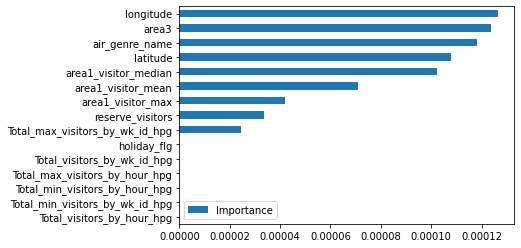

In [ ]:
#model_params={'max_depth':12,
              #'max_features':'auto',
              #'min_samples_split':3,
              #'n_estimators':100
    #          }
#forest,pred_test_y=random_forest(train_x,train_y,test_x,**model_params)
#plot_important_feature_rf(forest)
#RMSLE(test_y,pred_test_y)

plot_important_feature_rf(model)

In [ ]:
rf=model.predict(test_x)
rf

array([17.90422625, 21.33970724, 25.46029415, ..., 24.27913682,
       16.76996527, 12.83223275])

In [ ]:
rf1=pd.DataFrame(rf)
predicted_data['visitors']=rf1

In [ ]:
predicted_data["visitors"] = predicted_data["visitors"].apply(lambda x: 0 if x<0 else int(x))

In [ ]:
predicted_data.head()

,id,air_store_id,visit_date,visitors,weekday,year,month,day
0,air_00a91d42b08b08d9_2017-04-23,air_00a91d42b08b08d9,2017-04-23,17,6,2017,4,23
1,air_00a91d42b08b08d9_2017-04-24,air_00a91d42b08b08d9,2017-04-24,21,0,2017,4,24
2,air_00a91d42b08b08d9_2017-04-25,air_00a91d42b08b08d9,2017-04-25,25,1,2017,4,25
3,air_00a91d42b08b08d9_2017-04-26,air_00a91d42b08b08d9,2017-04-26,26,2,2017,4,26
4,air_00a91d42b08b08d9_2017-04-27,air_00a91d42b08b08d9,2017-04-27,11,3,2017,4,27


In [ ]:
rf_model=predicted_data.to_csv('/content/drive/My Drive/Dataset/rf_model_prediction.csv')

**Linear Regression**

In [ ]:
import statsmodels.api  as  sm
from sklearn import linear_model

from sklearn.preprocessing import StandardScaler
import pickle

In [ ]:
clf=linear_model.SGDRegressor(alpha=0.01,loss='squared_loss',penalty='l2',max_iter=3500,average=True)
scaler = StandardScaler(with_mean=False)
scaler.fit(train_x)
train_x = scaler.transform(train_x)
test_x = scaler.transform(test_x)
clf.fit(train_x,train_y)

SGDRegressor(alpha=0.01, average=True, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=3500,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [ ]:
pickle.dump(scaler,open('/content/drive/My Drive/Dataset/scaler.pkl','wb'))

In [ ]:
filename = '/content/drive/My Drive/Dataset/finalized_model.sav'
pickle.dump(clf, open(filename, 'wb'))

In [ ]:
pred_y=clf.predict(test_x)
rmsle_SGD =RMSLE(test_y,pred_y)
print('RF Test RMSLE: %.3f' % rmsle_SGD)

RF Test RMSLE: 29.868


In [ ]:
SGD_1=pd.DataFrame(pred_y)


In [ ]:
SGD_1.round(2)

,0
0,1.521562e+14
1,1.522039e+14
2,1.520662e+14
3,1.518361e+14
4,1.525020e+14
...,...
50417,1.524952e+14
50418,1.522301e+14
50419,1.517368e+14
50420,1.523781e+14


In [ ]:
predicted_data['visitors']=SGD_1

In [ ]:
predicted_data["visitors"] = predicted_data["visitors"].apply(lambda x: 0 if x<0 else int(x))

In [ ]:
predicted_data[predicted_data['visitors']>0]

,id,air_store_id,visit_date,visitors,weekday,year,month,day
0,air_00a91d42b08b08d9_2017-04-23,air_00a91d42b08b08d9,2017-04-23,1.521562e+14,6,2017,4,23
1,air_00a91d42b08b08d9_2017-04-24,air_00a91d42b08b08d9,2017-04-24,1.522039e+14,0,2017,4,24
2,air_00a91d42b08b08d9_2017-04-25,air_00a91d42b08b08d9,2017-04-25,1.520662e+14,1,2017,4,25
3,air_00a91d42b08b08d9_2017-04-26,air_00a91d42b08b08d9,2017-04-26,1.518361e+14,2,2017,4,26
4,air_00a91d42b08b08d9_2017-04-27,air_00a91d42b08b08d9,2017-04-27,1.525020e+14,3,2017,4,27
...,...,...,...,...,...,...,...,...
32014,air_fff68b929994bfbd_2017-05-27,air_fff68b929994bfbd,2017-05-27,1.525544e+14,5,2017,5,27
32015,air_fff68b929994bfbd_2017-05-28,air_fff68b929994bfbd,2017-05-28,1.520238e+14,6,2017,5,28
32016,air_fff68b929994bfbd_2017-05-29,air_fff68b929994bfbd,2017-05-29,1.517825e+14,0,2017,5,29
32017,air_fff68b929994bfbd_2017-05-30,air_fff68b929994bfbd,2017-05-30,1.528929e+14,1,2017,5,30


In [ ]:
predicted_data.to_csv('/content/drive/My Drive/Dataset/Linear_SGD_Regression.csv')

**Ridge Regression**

In [ ]:
from statistics import mean 
cross_val_scores_ridge = [] 
alpha=[]
for i  in range(1,9):
  RidgeModel=Ridge(alpha=i*0.25)
  RidgeModel.fit(train_x,train_y)
  scores=cross_val_score(RidgeModel,Xtrain,Ytrain ,cv=10)
  avg_cross_val_score = mean(scores)*100
  cross_val_scores_ridge.append(avg_cross_val_score) 
  alpha.append(i * 0.25) 
for i in range(0, len(alpha)): 
    print(str(alpha[i])+' : '+str(cross_val_scores_ridge[i])) 

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=8.6385e-40): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=6.61985e-40): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=6.61986e-40): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=6.61988e-40): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=6.61986e-40): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlg

0.25 : 57.77238227940871
0.5 : 57.77238238333568
0.75 : 57.77238248725657
1.0 : 57.77238259117136
1.25 : 57.77238269508004
1.5 : 57.77238279898263
1.75 : 57.772382902879116
2.0 : 57.77238300676952


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=5.27846e-39): result may not be accurate.
  overwrite_a=True).T


In [ ]:
ridgeModelChosen = Ridge(alpha = 2) 
ridgeModelChosen.fit(train_x, train_y) 

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=6.88047e-39): result may not be accurate.
  overwrite_a=True).T


Ridge(alpha=2, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

In [ ]:
print(ridgeModelChosen.score(test_x, test_y)) 

0.5967509448320796


In [ ]:
pred_y=ridgeModelChosen.predict(test_x)
rmsle_Ridge =RMSLE(test_y,pred_y)
print('RF Test RMSLE: %.3f' % rmsle_Ridge)

RF Test RMSLE: 0.539


In [ ]:
Ridge_pred=pd.DataFrame(pred_y)
Ridge_pred.head()

,0
0,20.619237
1,21.458070
2,23.012318
3,29.531176
4,11.473483


In [ ]:
predicted_data['visitors']=Ridge_pred

In [ ]:
predicted_data["visitors"] = predicted_data["visitors"].apply(lambda x: 0 if x<0 else int(x))

In [ ]:
predicted_data.to_csv('/content/drive/My Drive/Dataset/Ridge_prediction.csv')

**DecisionTree**

In [ ]:
from sklearn.tree import DecisionTreeRegressor
def DecisionTree(train_x, train_y, test_x, **kwargs):
  Tree=DecisionTreeRegressor(**kwargs)
  Tree.fit(train_x,train_y)
  pred_y=Tree.predict(test_x)
  return(Tree,pred_y)


In [ ]:
model = DecisionTreeRegressor()
parameters = {
              "min_samples_split": [10, 20, 40],
              "max_depth": [2, 6, 8],
              "min_samples_leaf": [20, 40, 100],
              "max_leaf_nodes": [5, 20, 100],
             }
grid_obj = GridSearchCV(model, parameters, scoring=acc_scorer)
grid_obj = grid_obj.fit(train_x, train_y)
model_params = grid_obj.best_params_
model_params

{'max_depth': 8,
 'max_leaf_nodes': 100,
 'min_samples_leaf': 100,
 'min_samples_split': 10}

In [ ]:
def plot_important_feature_DT(tree):
  important=pd.DataFrame(tree.feature_importances_,columns=['Importance'],index=train_x.columns)
  imp=important.sort_values(['Importance'],ascending=True)

  imp[:15].plot(kind='barh')

In [ ]:
model_params = {'max_depth': 8,
 'max_leaf_nodes': 100,
 'min_samples_leaf': 100,
 'min_samples_split': 10}
Tree, pred_testy = DecisionTree(train_x,train_y,test_x,**model_params)
#plot_important_feature_DT(Tree)
RMSLE(test_y,pred_testy)

0.5341697959598496

In [ ]:
Tree, pred_y = DecisionTree(Xtrain,Ytrain,Xtest,**model_params)
predicted_data["visitors"] = pred_y
predicted_data["visitors"] = predicted_data["visitors"].apply(lambda x: 0 if x<0 else int(x))
predicted_data.head()

,id,air_store_id,visit_date,visitors,weekday,year,month,day
0,air_00a91d42b08b08d9_2017-04-23,air_00a91d42b08b08d9,2017-04-23,3,6,2017,4,23
1,air_00a91d42b08b08d9_2017-04-24,air_00a91d42b08b08d9,2017-04-24,3,0,2017,4,24
2,air_00a91d42b08b08d9_2017-04-25,air_00a91d42b08b08d9,2017-04-25,3,1,2017,4,25
3,air_00a91d42b08b08d9_2017-04-26,air_00a91d42b08b08d9,2017-04-26,3,2,2017,4,26
4,air_00a91d42b08b08d9_2017-04-27,air_00a91d42b08b08d9,2017-04-27,3,3,2017,4,27


In [ ]:
predicted_data.to_csv('/content/drive/My Drive/Dataset/DT_model_prediction.csv')

**CatBoost**

In [ ]:
#!pip install catboost
from catboost import CatBoostRegressor
def Catboost(train_x,train_y, test_x,**kwargs):
  Cat=CatBoostRegressor(**kwargs)
  Cat.fit(train_x, train_y)
  pred_y=Cat.predict(test_x)
  return(Cat,pred_y)

     |████████████████████████████████| 66.1MB 97kB/s 


,id,air_store_id,visit_date,visitors,weekday,year,month,day
0,air_00a91d42b08b08d9_2017-04-23,air_00a91d42b08b08d9,2017-04-23,0,6,2017,4,23
1,air_00a91d42b08b08d9_2017-04-24,air_00a91d42b08b08d9,2017-04-24,0,0,2017,4,24
2,air_00a91d42b08b08d9_2017-04-25,air_00a91d42b08b08d9,2017-04-25,0,1,2017,4,25
3,air_00a91d42b08b08d9_2017-04-26,air_00a91d42b08b08d9,2017-04-26,0,2,2017,4,26
4,air_00a91d42b08b08d9_2017-04-27,air_00a91d42b08b08d9,2017-04-27,0,3,2017,4,27


In [ ]:

model = CatBoostRegressor()
parameters = {    'depth'         : [6,8,10],
                  'learning_rate' : [0.01, 0.05, 0.1],
                  'iterations'    : [2000]
                 }
grid_obj = GridSearchCV(model, parameters, scoring=acc_scorer,cv=2, n_jobs=-1)
grid_obj = grid_obj.fit(train_x, train_y)
model_params = grid_obj.best_params_
model_params

/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


0:	learn: 16.4124233	total: 199ms	remaining: 6m 37s
1:	learn: 15.9832892	total: 354ms	remaining: 5m 53s
2:	learn: 15.5757375	total: 492ms	remaining: 5m 27s
3:	learn: 15.2057369	total: 622ms	remaining: 5m 10s
4:	learn: 14.8593143	total: 755ms	remaining: 5m 1s
5:	learn: 14.5372049	total: 894ms	remaining: 4m 57s
6:	learn: 14.2337530	total: 1.03s	remaining: 4m 52s
7:	learn: 13.9493307	total: 1.17s	remaining: 4m 50s
8:	learn: 13.6836602	total: 1.3s	remaining: 4m 47s
9:	learn: 13.4404074	total: 1.44s	remaining: 4m 47s
10:	learn: 13.2132936	total: 1.58s	remaining: 4m 45s
11:	learn: 13.0015213	total: 1.71s	remaining: 4m 42s
12:	learn: 12.8032366	total: 1.84s	remaining: 4m 41s
13:	learn: 12.6240042	total: 1.98s	remaining: 4m 40s
14:	learn: 12.4552909	total: 2.12s	remaining: 4m 40s
15:	learn: 12.2970468	total: 2.25s	remaining: 4m 39s
16:	learn: 12.1546269	total: 2.39s	remaining: 4m 38s
17:	learn: 12.0215231	total: 2.53s	remaining: 4m 38s
18:	learn: 11.8973766	total: 2.67s	remaining: 4m 38s
19:	l

{'depth': 10, 'iterations': 2000, 'learning_rate': 0.05}

In [ ]:
def plot_important_feature_Cat(Cat):
  important=pd.DataFrame(Cat.feature_importances_,columns=['Importance'],index=train_x.columns)
  imp=important.sort_values(['Importance'],ascending=True)

  imp[:20].plot(kind='barh')

0:	learn: 16.4124233	total: 137ms	remaining: 4m 33s
1:	learn: 15.9832892	total: 282ms	remaining: 4m 41s
2:	learn: 15.5757375	total: 419ms	remaining: 4m 38s
3:	learn: 15.2057369	total: 553ms	remaining: 4m 35s
4:	learn: 14.8593143	total: 696ms	remaining: 4m 37s
5:	learn: 14.5372049	total: 831ms	remaining: 4m 36s
6:	learn: 14.2337530	total: 975ms	remaining: 4m 37s
7:	learn: 13.9493307	total: 1.11s	remaining: 4m 36s
8:	learn: 13.6836602	total: 1.25s	remaining: 4m 37s
9:	learn: 13.4404074	total: 1.39s	remaining: 4m 36s
10:	learn: 13.2132936	total: 1.52s	remaining: 4m 35s
11:	learn: 13.0015213	total: 1.66s	remaining: 4m 34s
12:	learn: 12.8032366	total: 1.79s	remaining: 4m 33s
13:	learn: 12.6240042	total: 1.93s	remaining: 4m 34s
14:	learn: 12.4552909	total: 2.07s	remaining: 4m 33s
15:	learn: 12.2970468	total: 2.21s	remaining: 4m 33s
16:	learn: 12.1546269	total: 2.35s	remaining: 4m 34s
17:	learn: 12.0215231	total: 2.49s	remaining: 4m 33s
18:	learn: 11.8973766	total: 2.62s	remaining: 4m 33s
19:

0.5024847558893116

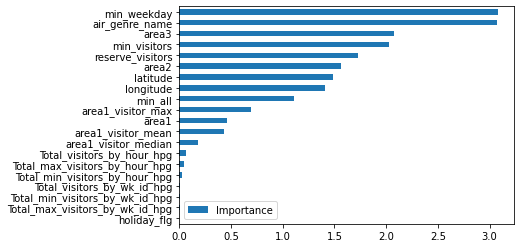

In [ ]:
 parameters = {    'depth'         : [10],
                  'learning_rate' : [ 0.05],
                  'iterations'    : [2000]
                 }
Cat, pred_testy = Catboost(train_x,train_y,test_x,**model_params)


plot_important_feature_Cat(Cat)
rmsle_cat =RMSLE(test_y,pred_testy)
rmsle_cat

In [ ]:
predicted_data.head(2)

,id,air_store_id,visit_date,visitors,weekday,year,month,day
0,air_00a91d42b08b08d9_2017-04-23,air_00a91d42b08b08d9,2017-04-23,17,6,2017,4,23
1,air_00a91d42b08b08d9_2017-04-24,air_00a91d42b08b08d9,2017-04-24,21,0,2017,4,24


In [ ]:
Cat, pred_y = Catboost(Xtrain,Ytrain,Xtest,**model_params)
predicted_data["visitors"] = pred_y
predicted_data["visitors"] = predicted_data["visitors"].apply(lambda x: 0 if x<0 else int(x))
predicted_data

0:	learn: 16.2917443	total: 173ms	remaining: 5m 46s
1:	learn: 15.8616214	total: 345ms	remaining: 5m 44s
2:	learn: 15.4587834	total: 514ms	remaining: 5m 41s
3:	learn: 15.0863809	total: 685ms	remaining: 5m 41s
4:	learn: 14.7353612	total: 859ms	remaining: 5m 42s
5:	learn: 14.4172205	total: 1.02s	remaining: 5m 40s
6:	learn: 14.1169970	total: 1.19s	remaining: 5m 38s
7:	learn: 13.8344838	total: 1.37s	remaining: 5m 40s
8:	learn: 13.5798570	total: 1.53s	remaining: 5m 39s
9:	learn: 13.3382424	total: 1.7s	remaining: 5m 38s
10:	learn: 13.1149895	total: 1.88s	remaining: 5m 39s
11:	learn: 12.9109874	total: 2.04s	remaining: 5m 38s
12:	learn: 12.7171320	total: 2.21s	remaining: 5m 38s
13:	learn: 12.5377549	total: 2.38s	remaining: 5m 38s
14:	learn: 12.3746691	total: 2.55s	remaining: 5m 37s
15:	learn: 12.2206362	total: 2.72s	remaining: 5m 37s
16:	learn: 12.0779626	total: 2.9s	remaining: 5m 38s
17:	learn: 11.9474035	total: 3.07s	remaining: 5m 38s
18:	learn: 11.8276122	total: 3.24s	remaining: 5m 37s
19:	l

,id,air_store_id,visit_date,visitors,weekday,year,month,day
0,air_00a91d42b08b08d9_2017-04-23,air_00a91d42b08b08d9,2017-04-23,0,6,2017,4,23
1,air_00a91d42b08b08d9_2017-04-24,air_00a91d42b08b08d9,2017-04-24,1,0,2017,4,24
2,air_00a91d42b08b08d9_2017-04-25,air_00a91d42b08b08d9,2017-04-25,0,1,2017,4,25
3,air_00a91d42b08b08d9_2017-04-26,air_00a91d42b08b08d9,2017-04-26,0,2,2017,4,26
4,air_00a91d42b08b08d9_2017-04-27,air_00a91d42b08b08d9,2017-04-27,0,3,2017,4,27
...,...,...,...,...,...,...,...,...
32014,air_fff68b929994bfbd_2017-05-27,air_fff68b929994bfbd,2017-05-27,0,5,2017,5,27
32015,air_fff68b929994bfbd_2017-05-28,air_fff68b929994bfbd,2017-05-28,0,6,2017,5,28
32016,air_fff68b929994bfbd_2017-05-29,air_fff68b929994bfbd,2017-05-29,0,0,2017,5,29
32017,air_fff68b929994bfbd_2017-05-30,air_fff68b929994bfbd,2017-05-30,0,1,2017,5,30


,id,air_store_id,visit_date,visitors,weekday,year,month,day
125,air_0328696196e46f18_2017-05-01,air_0328696196e46f18,2017-05-01,4,0,2017,5,1
127,air_0328696196e46f18_2017-05-03,air_0328696196e46f18,2017-05-03,4,2,2017,5,3
128,air_0328696196e46f18_2017-05-04,air_0328696196e46f18,2017-05-04,5,3,2017,5,4
164,air_034a3d5b40d5b1b1_2017-05-01,air_034a3d5b40d5b1b1,2017-05-01,6,0,2017,5,1
165,air_034a3d5b40d5b1b1_2017-05-02,air_034a3d5b40d5b1b1,2017-05-02,6,1,2017,5,2
...,...,...,...,...,...,...,...,...
31367,air_fab092c35776a9b1_2017-05-04,air_fab092c35776a9b1,2017-05-04,4,3,2017,5,4
31717,air_fdcfef8bd859f650_2017-05-03,air_fdcfef8bd859f650,2017-05-03,4,2,2017,5,3
31718,air_fdcfef8bd859f650_2017-05-04,air_fdcfef8bd859f650,2017-05-04,4,3,2017,5,4
31834,air_fea5dc9594450608_2017-05-03,air_fea5dc9594450608,2017-05-03,4,2,2017,5,3


In [ ]:
cat_model=predicted_data.to_csv('/content/drive/My Drive/Dataset/Cat_model_prediction.csv')

**Deep Learning Model**

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(train_x)
train_x = scaler.transform(train_x)
test_x = scaler.transform(test_x)

In [ ]:
np.random.seed(0)
from keras.preprocessing import sequence
from keras.models import Sequential,Model
from keras.layers import Dropout,Dense,TimeDistributed,Conv1D,MaxPooling1D,Flatten,LSTM,Embedding,Activation,Input
from keras.callbacks import EarlyStopping,ModelCheckpoint
from keras.optimizers import Adam
import h5py
from keras import backend
import tensorflow
tensorflow.random.set_seed(99)


In [ ]:
adam=Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999,epsilon=1e-05)


In [ ]:
filepath = 'best_wt_recruit_new.hdf5'

In [ ]:
callbacks=[EarlyStopping(monitor='val_loss',patience=30,verbose=0),ModelCheckpoint(filepath=filepath,monitor='val_loss',save_best_only=True,mode='min')]


In [ ]:
dropout=0.25
model=Sequential()
model.add(Dense(250, activation='relu',input_shape=(train_x.shape[1],)))
model.add(Dropout(dropout))
model.add(Dense(30, activation='relu'))
model.add(Dropout(dropout))
model.add(Dense(1,activation='relu'))
model.summary()



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 250)               8000      
_________________________________________________________________
dropout (Dropout)            (None, 250)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 30)                7530      
_________________________________________________________________
dropout_1 (Dropout)          (None, 30)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 31        
Total params: 15,561
Trainable params: 15,561
Non-trainable params: 0
_________________________________________________________________


In [ ]:

model.compile(loss='mse',optimizer=adam)

In [ ]:
model.fit(np.array(train_x), np.array(train_y), epochs=150, batch_size=10, validation_data=(np.array(test_x), np.array(test_y)),


            verbose=2, callbacks=callbacks, shuffle=False)


Epoch 1/150
20169/20169 - 39s - loss: 136.3401 - val_loss: 105.3542
Epoch 2/150
20169/20169 - 40s - loss: 126.8631 - val_loss: 103.2728
Epoch 3/150
20169/20169 - 39s - loss: 122.8211 - val_loss: 102.6413
Epoch 4/150
20169/20169 - 40s - loss: 121.2148 - val_loss: 101.1880
Epoch 5/150
20169/20169 - 40s - loss: 117.6239 - val_loss: 101.7195
Epoch 6/150
20169/20169 - 40s - loss: 117.6352 - val_loss: 100.8431
Epoch 7/150
20169/20169 - 41s - loss: 116.0467 - val_loss: 100.5681
Epoch 8/150
20169/20169 - 40s - loss: 118.4292 - val_loss: 101.1046
Epoch 9/150
20169/20169 - 40s - loss: 116.7374 - val_loss: 100.2301
Epoch 10/150
20169/20169 - 40s - loss: 116.3372 - val_loss: 100.0910
Epoch 11/150
20169/20169 - 39s - loss: 114.1757 - val_loss: 99.2963
Epoch 12/150
20169/20169 - 40s - loss: 114.7507 - val_loss: 99.8845
Epoch 13/150
20169/20169 - 40s - loss: 116.1105 - val_loss: 98.9311
Epoch 14/150
20169/20169 - 40s - loss: 117.4531 - val_loss: 100.7069
Epoch 15/150
20169/20169 - 41s - loss: 113.589

In [ ]:
model.load_weights('best_wt_recruit_new.hdf5')

In [ ]:
import sklearn.metrics as metrics
def RMSLE(y, pred):
    return metrics.mean_squared_error(y, pred)**0.5

In [ ]:
pred = model.predict(test_x)
print('RMSE NeuralNetwork: ', RMSLE(np.log1p(test_y), pred))


RMSE NeuralNetwork:  21.368792194789144


In [ ]:
p1=pd.DataFrame(pred)


In [ ]:
predicted_data['visitors']=p1

In [ ]:
predicted_data.head()

,id,air_store_id,visit_date,visitors,weekday,year,month,day
0,air_00a91d42b08b08d9_2017-04-23,air_00a91d42b08b08d9,2017-04-23,16.459770,6,2017,4,23
1,air_00a91d42b08b08d9_2017-04-24,air_00a91d42b08b08d9,2017-04-24,21.429665,0,2017,4,24
2,air_00a91d42b08b08d9_2017-04-25,air_00a91d42b08b08d9,2017-04-25,18.260101,1,2017,4,25
3,air_00a91d42b08b08d9_2017-04-26,air_00a91d42b08b08d9,2017-04-26,26.079201,2,2017,4,26
4,air_00a91d42b08b08d9_2017-04-27,air_00a91d42b08b08d9,2017-04-27,7.357246,3,2017,4,27


**LSTM Archietecture**

In [ ]:
train_x=np.reshape(train_x,(train_x.shape[0],1, train_x.shape[1]))
test_x=np.reshape(test_x,(test_x.shape[0],1,test_x.shape[1]))

In [ ]:
model1=Sequential()
model1.add(LSTM(4,input_shape=(1, 31),return_sequences=True))
model1.add(Dense(1))
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 1, 4)              576       
_________________________________________________________________
dense (Dense)                (None, 1, 1)              5         
Total params: 581
Trainable params: 581
Non-trainable params: 0
_________________________________________________________________


In [ ]:
filepath = 'best_wt_recruit_new1.hdf5'

In [ ]:
callbacks=[EarlyStopping(monitor='loss',patience=30,verbose=0),ModelCheckpoint(filepath=filepath,monitor='loss',save_best_only=True,mode='min')]


In [ ]:

model1.compile(loss='mean_squared_error',optimizer='adam')

In [ ]:
model1.fit(train_x, train_y, epochs=100, batch_size=20,callbacks=callbacks, verbose=2)

Epoch 1/100
10085/10085 - 38s - loss: 298.1845
Epoch 2/100
10085/10085 - 38s - loss: 143.0569
Epoch 3/100
10085/10085 - 38s - loss: 129.2930
Epoch 4/100
10085/10085 - 38s - loss: 125.5193
Epoch 5/100
10085/10085 - 39s - loss: 123.4770
Epoch 6/100
10085/10085 - 38s - loss: 122.3035
Epoch 7/100
10085/10085 - 37s - loss: 121.4844
Epoch 8/100
10085/10085 - 38s - loss: 120.8117
Epoch 9/100
10085/10085 - 37s - loss: 120.3961
Epoch 10/100
10085/10085 - 38s - loss: 119.9868
Epoch 11/100
10085/10085 - 38s - loss: 119.5180
Epoch 12/100
10085/10085 - 38s - loss: 119.1698
Epoch 13/100
10085/10085 - 38s - loss: 118.8527
Epoch 14/100
10085/10085 - 37s - loss: 118.6987
Epoch 15/100
10085/10085 - 37s - loss: 118.3128
Epoch 16/100
10085/10085 - 37s - loss: 118.1619
Epoch 17/100
10085/10085 - 37s - loss: 117.9409
Epoch 18/100
10085/10085 - 37s - loss: 117.8207
Epoch 19/100
10085/10085 - 37s - loss: 117.6420
Epoch 20/100
10085/10085 - 37s - loss: 117.5067
Epoch 21/100
10085/10085 - 38s - loss: 117.3287
E

In [ ]:
model1.load_weights('best_wt_recruit_new1.hdf5')

In [ ]:
pred = model1.predict(test_x)


In [ ]:


pred


array([[[16.417847]],

       [[22.895866]],

       [[14.52632 ]],

       ...,

       [[25.301025]],

       [[17.96586 ]],

       [[10.521961]]], dtype=float32)

In [ ]:
p2=np.array(list(i[0] for i in pred)).reshape(-1,1)

In [ ]:
p3=pd.DataFrame(p2)

In [ ]:
predicted_data['visitors']=p3

In [ ]:
predicted_data.head()

,id,air_store_id,visit_date,visitors,weekday,year,month,day
0,air_00a91d42b08b08d9_2017-04-23,air_00a91d42b08b08d9,2017-04-23,16.417847,6,2017,4,23
1,air_00a91d42b08b08d9_2017-04-24,air_00a91d42b08b08d9,2017-04-24,22.895866,0,2017,4,24
2,air_00a91d42b08b08d9_2017-04-25,air_00a91d42b08b08d9,2017-04-25,14.526320,1,2017,4,25
3,air_00a91d42b08b08d9_2017-04-26,air_00a91d42b08b08d9,2017-04-26,24.384165,2,2017,4,26
4,air_00a91d42b08b08d9_2017-04-27,air_00a91d42b08b08d9,2017-04-27,7.511191,3,2017,4,27


In [ ]:
pred = model1.predict(test_x)
print('RMSE NeuralNetwork: ', RMSLE(np.log1p(test_y), p2))

RMSE NeuralNetwork:  21.898571980939955


**CNN Architecture**

In [ ]:
filepath = 'best_wt_recruit_new2.hdf5'

In [ ]:
callbacks=[EarlyStopping(monitor='loss',patience=30,verbose=0),ModelCheckpoint(filepath=filepath,monitor='loss',save_best_only=True,mode='min')]

In [ ]:
train_x = train_x.reshape(train_x.shape[0], 31, 1)
test_x = test_x.reshape(test_x.shape[0], 31, 1)

In [ ]:
model3=Sequential()
model3.add(Conv1D(16,16,  activation='relu', input_shape=(train_x.shape[1],1)))
model3.add(Dropout(0.5))
model3.add(MaxPooling1D(pool_size=2))
model3.add(Flatten())
model3.add(Dense(1, activation='relu'))



In [ ]:
model3.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 16, 16)            272       
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16)            0         
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 8, 16)             0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 401
Trainable params: 401
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model3.compile(loss='mean_squared_error',optimizer=adam)

In [ ]:
model3.fit(train_x, train_y, epochs=100, batch_size=10,callbacks=callbacks, verbose=2)

Epoch 1/100
20169/20169 - 39s - loss: 130.8525
Epoch 2/100
20169/20169 - 38s - loss: 125.6407
Epoch 3/100
20169/20169 - 37s - loss: 124.3735
Epoch 4/100
20169/20169 - 38s - loss: 124.9814
Epoch 5/100
20169/20169 - 37s - loss: 124.4861
Epoch 6/100
20169/20169 - 37s - loss: 123.0714
Epoch 7/100
20169/20169 - 37s - loss: 122.8576
Epoch 8/100
20169/20169 - 37s - loss: 122.2208
Epoch 9/100
20169/20169 - 37s - loss: 122.2135
Epoch 10/100
20169/20169 - 36s - loss: 122.1881
Epoch 11/100
20169/20169 - 37s - loss: 122.0982
Epoch 12/100
20169/20169 - 37s - loss: 122.4237
Epoch 13/100
20169/20169 - 36s - loss: 121.6504
Epoch 14/100
20169/20169 - 36s - loss: 120.8539
Epoch 15/100
20169/20169 - 36s - loss: 121.1103
Epoch 16/100
20169/20169 - 36s - loss: 121.0974
Epoch 17/100
20169/20169 - 36s - loss: 120.4574
Epoch 18/100
20169/20169 - 36s - loss: 121.5724
Epoch 19/100
20169/20169 - 36s - loss: 121.2108
Epoch 20/100
20169/20169 - 37s - loss: 121.5073
Epoch 21/100
20169/20169 - 37s - loss: 121.1886
E

In [ ]:
pred=model3.predict(test_x)

In [ ]:
p3=pd.DataFrame(pred)

In [ ]:
predicted_data['visitors']=p3

In [ ]:
predicted_data.head()

,id,air_store_id,visit_date,visitors,weekday,year,month,day
0,air_00a91d42b08b08d9_2017-04-23,air_00a91d42b08b08d9,2017-04-23,24.859257,6,2017,4,23
1,air_00a91d42b08b08d9_2017-04-24,air_00a91d42b08b08d9,2017-04-24,20.091806,0,2017,4,24
2,air_00a91d42b08b08d9_2017-04-25,air_00a91d42b08b08d9,2017-04-25,13.736443,1,2017,4,25
3,air_00a91d42b08b08d9_2017-04-26,air_00a91d42b08b08d9,2017-04-26,26.124790,2,2017,4,26
4,air_00a91d42b08b08d9_2017-04-27,air_00a91d42b08b08d9,2017-04-27,11.153193,3,2017,4,27


In [ ]:
print('RMSE NeuralNetwork: ', RMSLE(np.log1p(test_y), p3))

RMSE NeuralNetwork:  19.98952523030952
